------------------
## Caso 1 — Serie temporal de una variable econométrica

El siguiente archivo ( ```csv```) contiene la evolución temporal de una variable econométrica:

[Descarga estos datos](https://drive.upm.es/s/Qsd5K7P6aDZpfcj)

Los datos incluyen dos columnas. La primera es una fecha (tiempo), y la segunda es el valor econométrico a estudiar. Crea un modelo predictivo y predice el valor de la variable econométrica a fecha **1 de enero de 2026.**

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import matplotlib.dates as mdates


### 1. EDA: Analisis exploratorio de datos

#### 1.1 Comprensión del dataset

In [3]:
# Inspeccionamos el csv
df = pd.read_csv("variable_economica.csv")

print("----- VALORES ESTADISTICOS PRINCIPALES DEL DATASET-----\n",df.describe())

print("\n----- DESCRIPCION DEL DATASET-----")
df.info()



----- VALORES ESTADISTICOS PRINCIPALES DEL DATASET-----
             value
count  744.000000
mean   371.056077
std     46.614905
min    262.869000
25%    336.199500
50%    367.170000
75%    401.519500
max    505.886000

----- DESCRIPCION DEL DATASET-----
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 744 entries, 0 to 743
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   date    744 non-null    object 
 1   value   744 non-null    float64
dtypes: float64(1), object(1)
memory usage: 11.8+ KB


#### 1.2 Visualización de datos


Información del Dataset:
   Periodo: 1919-01-01 00:00:00 → 1980-01-11 00:00:00
   Observaciones: 744
   Frecuencia: Mensual (61.0 años)
   Rango de valores: [262.87, 505.89]


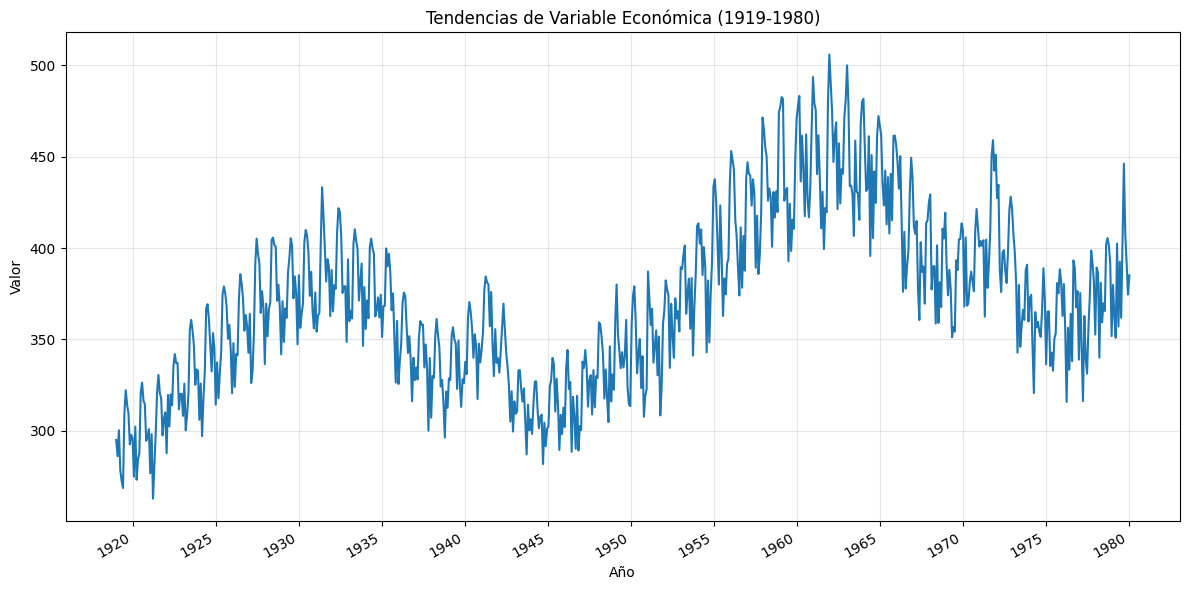

In [4]:
# Visualizacion de datos
# Cargar los datos
df = pd.read_csv('variable_economica.csv', parse_dates=["date"])
df = df.sort_values("date").reset_index(drop=True)

# Convertir la columna de fecha a formato datetime
df['date'] = pd.to_datetime(df['date'])

# Información básica
print(f"\nInformación del Dataset:")
print(f"   Periodo: {df['date'].min()} → {df['date'].max()}")
print(f"   Observaciones: {len(df)}")
print(f"   Frecuencia: Mensual ({(df['date'].max() - df['date'].min()).days / 365.25:.1f} años)")
print(f"   Rango de valores: [{df['value'].min():.2f}, {df['value'].max():.2f}]")

# Crear el gráfico
plt.figure(figsize=(12, 6))
plt.plot(df['date'], df['value'])

# Formatear el gráfico
plt.title('Tendencias de Variable Económica (1919-1980)')
plt.xlabel('Año')
plt.ylabel('Valor')
plt.grid(True, alpha=0.3)

# Formatear el eje x para mostrar los años correctamente
plt.gca().xaxis.set_major_locator(mdates.YearLocator(5))  # Mostrar cada 5 años
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y'))

# Rotar etiquetas de fecha para mejor legibilidad
plt.gcf().autofmt_xdate()

# Mostrar el gráfico
plt.tight_layout()
plt.show()


🎯 Objetivo de Predicción:
   Fecha objetivo: 2026-01-01
   Gap temporal: 552 meses (46.0 años)
   Ratio extrapolación: 0.74x

🔢 Número de Condición: 857.37
   ✓ Aceptable: Buena estabilidad numérica


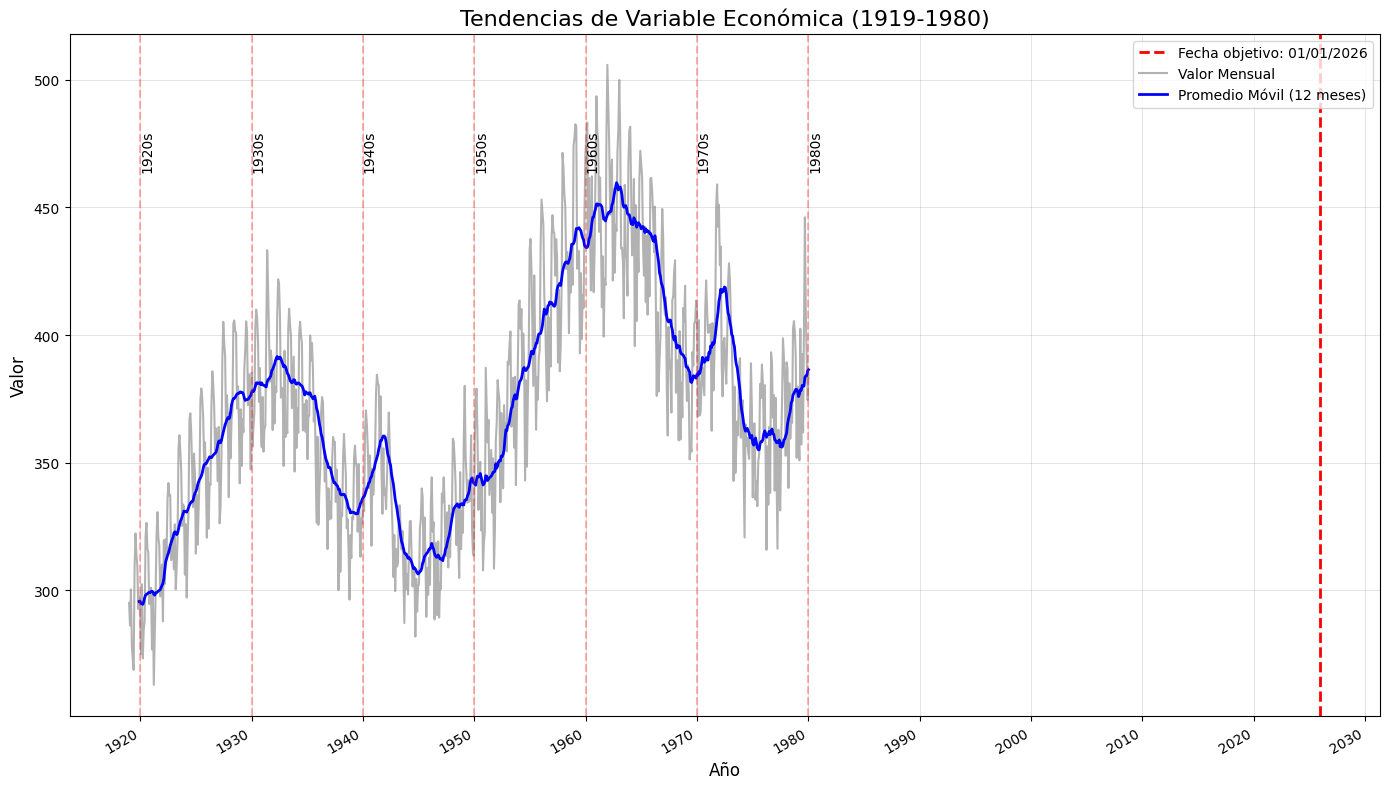

In [5]:
# Enfoque avanzado con analisis de tendencias

# Fecha que queremos predecir
target_date = pd.to_datetime('2026-01-01')
last_date = df["date"].max()
meses_faltantes = (target_date.year - last_date.year) * 12 + (target_date.month - last_date.month)
años_faltantes = meses_faltantes/12

print(f"\n🎯 Objetivo de Predicción:")
print(f"   Fecha objetivo: {target_date.date()}")
print(f"   Gap temporal: {meses_faltantes} meses ({años_faltantes:.1f} años)")
print(f"   Ratio extrapolación: {meses_faltantes/len(df):.2f}x")

# Número de condición
def calcular_condicionamiento(data):
    '''
    Calcula el número de condicionamiento de la matriz de diseño. 
    Valores altos (>1000) indican problemas numéricos
    '''
    n = len(data)
    x = np.column_stack([np.ones(n), np.arange(n)])
    cond_num = np.linalg.cond(x)
    return cond_num

cond_num = calcular_condicionamiento(df["value"])
print(f"\n🔢 Número de Condición: {cond_num:.2f}")
if cond_num > 1000:
    print("   ⚠️ Alta: Posibles problemas numéricos → Usar transformación log")
else:
    print("   ✓ Aceptable: Buena estabilidad numérica")


# Calcular promedio móvil de 12 meses para suavizar fluctuaciones
df['promedio_movil'] = df['value'].rolling(window=12).mean()

# Crear el gráfico
fig, ax = plt.subplots(figsize=(14, 8))

# Fecha que queremos predecir
plt.axvline(target_date, color='r', linestyle='--', linewidth=2, label='Fecha objetivo: 01/01/2026')

# Graficar datos crudos y promedio móvil
ax.plot(df['date'], df['value'], label='Valor Mensual', color='grey', alpha=0.6)
ax.plot(df['date'], df['promedio_movil'], label='Promedio Móvil (12 meses)', 
        color='blue', linewidth=2)

# Formatear el gráfico
ax.set_title('Tendencias de Variable Económica (1919-1980)', fontsize=16)
ax.set_xlabel('Año', fontsize=12)
ax.set_ylabel('Valor', fontsize=12)
ax.grid(True, alpha=0.3)
ax.legend()

# Formatear el eje x
ax.xaxis.set_major_locator(mdates.YearLocator(10))  # Mostrar cada 10 años
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y'))

# Añadir separaciones por década y anotaciones
decades = range(1920, 1990, 10)
for decade in decades:
    ax.axvline(pd.Timestamp(f'{decade}-01-01'), color='red', linestyle='--', alpha=0.3)
    ax.text(pd.Timestamp(f'{decade}-01-01'), df['value'].max() * 0.95, f'{decade}s', 
            rotation=90, verticalalignment='top')

# Rotar etiquetas de fecha
fig.autofmt_xdate()

# Añadir cuadrícula para mejor legibilidad
ax.grid(True, which='major', linestyle='-', linewidth='0.5', color='gray', alpha=0.3)

# Mostrar el gráfico
plt.tight_layout()
plt.show()

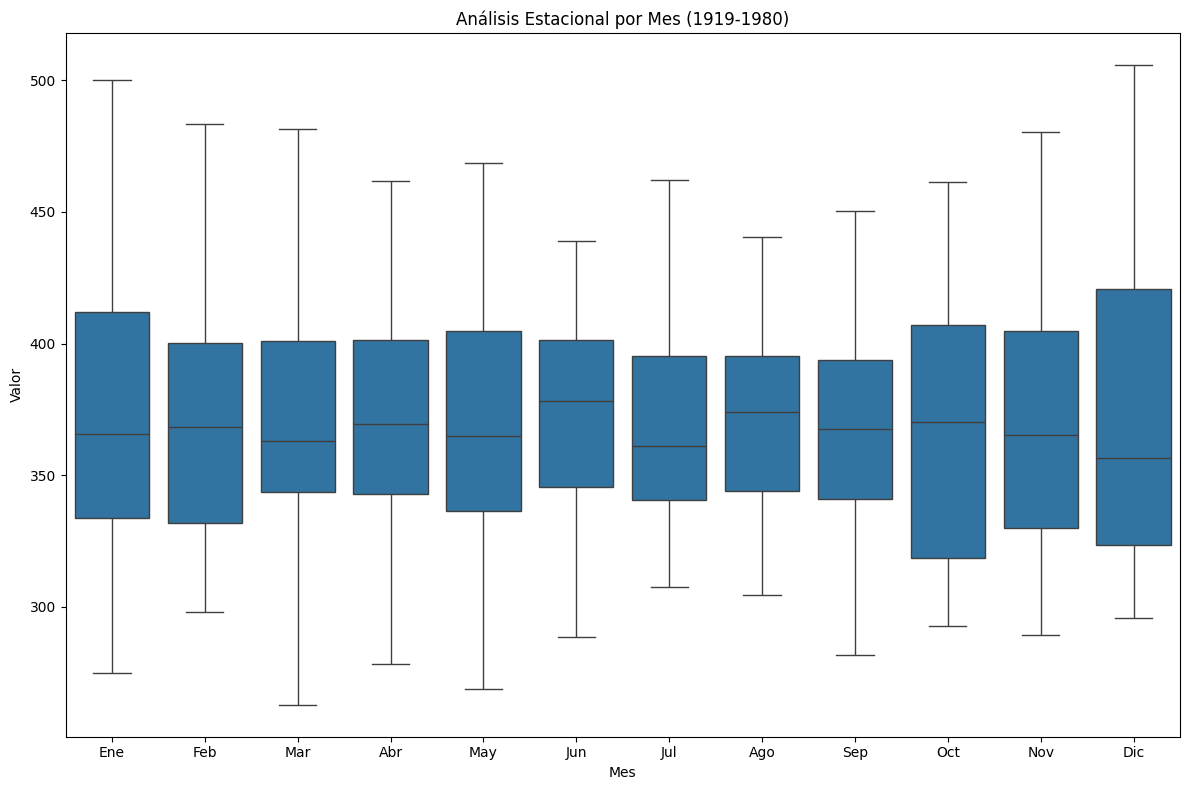

In [6]:
# Analisis estacional

# Extraer mes y año
df['month'] = df['date'].dt.month
df['year'] = df['date'].dt.year

# Crear gráfico estacional
plt.figure(figsize=(12, 8))
sns.boxplot(x='month', y='value', data=df)
plt.title('Análisis Estacional por Mes (1919-1980)')
plt.xlabel('Mes')
plt.ylabel('Valor')
plt.xticks(range(12), ['Ene', 'Feb', 'Mar', 'Abr', 'May', 'Jun', 
                      'Jul', 'Ago', 'Sep', 'Oct', 'Nov', 'Dic'])
plt.tight_layout()
plt.show()

#### 1.3 Análisis Estadístico

In [7]:
# Test de estacionariedad(ADF): Determinar si la serie es estacionaria

from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.seasonal import seasonal_decompose

# Test de estacionariedad
result = adfuller(df['value'])
print(f"- Estadístico ADF: {result[0]:.4f}")
print(f"- p-value: {result[1]:.4f}")
print(f"- Valores críticos: {result[4]}")

is_stationary = result[1] < 0.05
if is_stationary:
    print("   ✓ Serie ESTACIONARIA")
else:
    print("   ✗ Serie NO ESTACIONARIA → Requiere diferenciación")




- Estadístico ADF: -2.0543
- p-value: 0.2633
- Valores críticos: {'1%': -3.4394018678958544, '5%': -2.865534780932388, '10%': -2.5688972751486325}
   ✗ Serie NO ESTACIONARIA → Requiere diferenciación


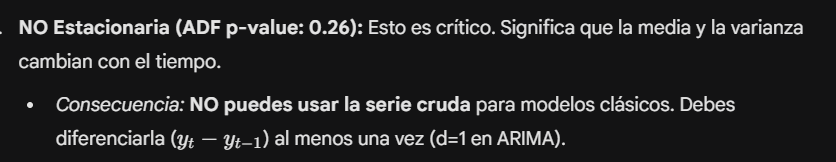

In [8]:
# Test de Normalidad: Verificar si los datos siguen distribucion normal

# Test de Jarque Bera: basado en asimetria y curtosis
from scipy.stats import jarque_bera

stat, p_value = jarque_bera(df['value'])
print(f"\nJarque-Bera Test:")
print(f"  Statistic: {stat:.4f}")
print(f"  p-value: {p_value:.4f}")

if p_value > 0.05:
    print("  ✓ Los datos son aproximadamente normales")
else:
    print("  ✗ Los datos NO son normales (asimetría/curtosis excesiva)")



Jarque-Bera Test:
  Statistic: 18.1595
  p-value: 0.0001
  ✗ Los datos NO son normales (asimetría/curtosis excesiva)


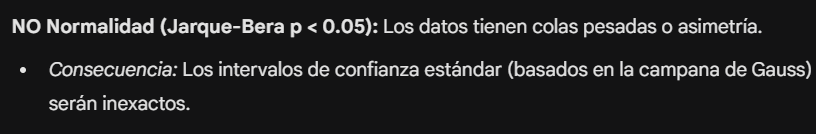

In [9]:
# Test de heterocedasticidad: Detectar si la varianza cambia a lo largo del tiempo

# Test de white
from statsmodels.stats.diagnostic import het_white
from statsmodels.tools import add_constant

# Crear variable temporal
df['time'] = range(len(df))

# Regresión simple: value ~ time
X = add_constant(df['time'])
y = df['value']

# Test de White
white_test = het_white(y, X)

print("Test de White para Heterocedasticidad:")
print(f"  LM Statistic: {white_test[0]:.4f}")
print(f"  p-value: {white_test[1]:.4f}")

if white_test[1] < 0.05:
    print("  ✗ Hay heterocedasticidad (varianza no constante)")
    print("  → Considerar transformación log o modelos GARCH")
else:
    print("  ✓ No hay evidencia de heterocedasticidad")


Test de White para Heterocedasticidad:
  LM Statistic: 188.3320
  p-value: 0.0000
  ✗ Hay heterocedasticidad (varianza no constante)
  → Considerar transformación log o modelos GARCH


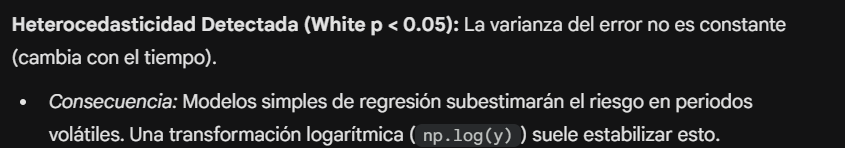

In [10]:
# Test de Autocorrelación: Detectar correlacion entre valores de la serie en diferetnes lags

# Test de Ljung-Box
from statsmodels.stats.diagnostic import acorr_ljungbox

lb_test = acorr_ljungbox(df['value'], lags=24, return_df=True)

print("Test de Ljung-Box para Autocorrelación:")
print(lb_test.tail())

# Contar cuántos lags tienen autocorrelación significativa
significant_lags = (lb_test['lb_pvalue'] < 0.05).sum()
print(f"\nLags con autocorrelación significativa: {significant_lags}/24")

if significant_lags > 0:
    print("  ✓ HAY autocorrelación (esperado en series temporales)")
    print("  → Usar modelos que capturen dependencia temporal (ARIMA, LSTM)")


Test de Ljung-Box para Autocorrelación:
         lb_stat  lb_pvalue
20   8344.844897        0.0
21   8696.348413        0.0
22   9105.007906        0.0
23   9537.684698        0.0
24  10059.349434        0.0

Lags con autocorrelación significativa: 24/24
  ✓ HAY autocorrelación (esperado en series temporales)
  → Usar modelos que capturen dependencia temporal (ARIMA, LSTM)


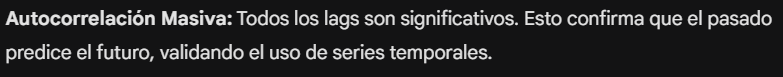

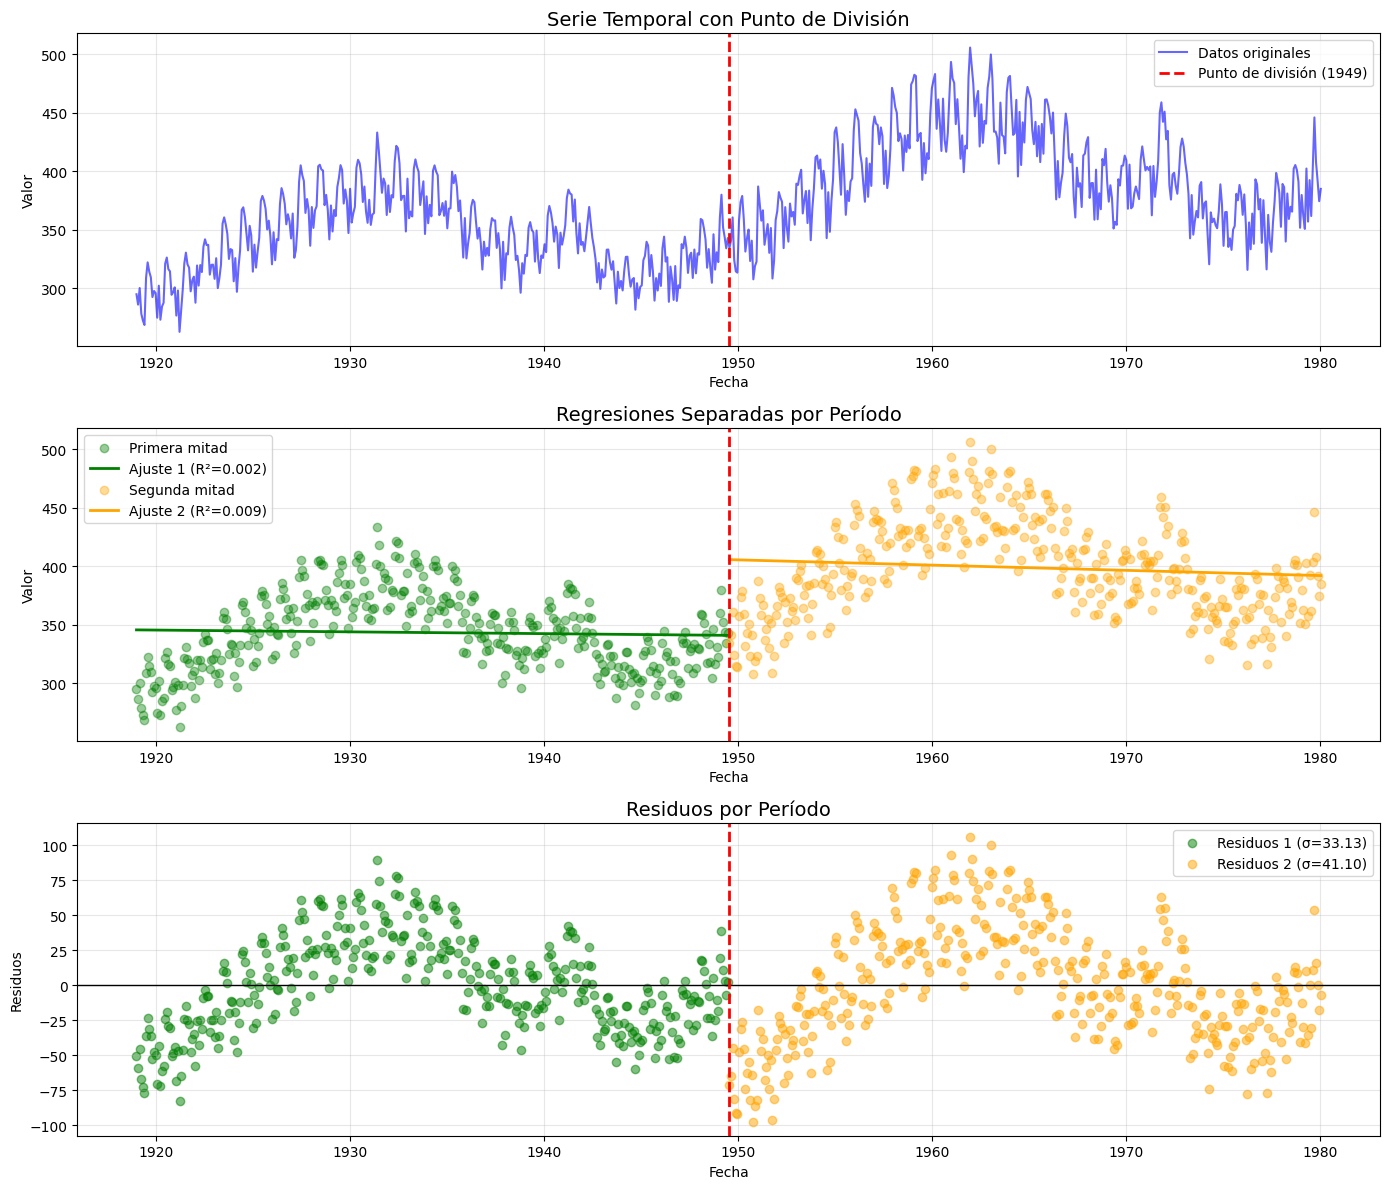


ANÁLISIS DE CAMBIO ESTRUCTURAL

PRIMERA MITAD (1919 - 1949):
  R² = 0.0017
  Pendiente = -0.0126
  Intercepto = 345.6075
  Desviación estándar residuos = 33.1299

SEGUNDA MITAD (1949 - 1980):
  R² = 0.0092
  Pendiente = -0.0368
  Intercepto = 419.3313
  Desviación estándar residuos = 41.0979

DIFERENCIAS:
  ΔR² = 0.0075
  ΔPendiente = 0.0242
  Δσ residuos = 7.9680

✓  No hay evidencia fuerte de cambio estructural


C:\Users\niaib\AppData\Local\Temp\ipykernel_29144\1631440857.py:85: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print(f"  Pendiente = {model1.params[1]:.4f}")
C:\Users\niaib\AppData\Local\Temp\ipykernel_29144\1631440857.py:86: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print(f"  Intercepto = {model1.params[0]:.4f}")
C:\Users\niaib\AppData\Local\Temp\ipykernel_29144\1631440857.py:91: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
 

In [11]:
# Test de cambios estructurales
# Test de Chow: Detectar si hay cambios en parametros del modelo en puntos especificos del tiempo

import matplotlib.pyplot as plt
from statsmodels.regression.linear_model import OLS
from statsmodels.tools import add_constant
import numpy as np

# Test de cambios estructurales con visualización
fig, axes = plt.subplots(3, 1, figsize=(14, 12))

# 1. Serie completa con división
ax1 = axes[0]
n = len(df)
mid = n // 2

ax1.plot(df['date'], df['value'], label='Datos originales', color='blue', alpha=0.6)
# Separación intermedia
ax1.axvline(df['date'].iloc[mid], color='red', linestyle='--', linewidth=2, 
            label=f'Punto de división ({df["date"].iloc[mid].year})')
ax1.set_title('Serie Temporal con Punto de División', fontsize=14)
ax1.set_xlabel('Fecha')
ax1.set_ylabel('Valor')
ax1.legend()
ax1.grid(True, alpha=0.3)

# 2. Regresiones por período con residuos
ax2 = axes[1]

# Primera mitad
X1 = add_constant(df['time'][:mid])
y1 = df['value'][:mid]
model1 = OLS(y1, X1).fit()
pred1 = model1.predict(X1)

# Segunda mitad
X2 = add_constant(df['time'][mid:])
y2 = df['value'][mid:]
model2 = OLS(y2, X2).fit()
pred2 = model2.predict(X2)

# Graficar datos y ajustes
ax2.scatter(df['date'][:mid], y1, alpha=0.4, label='Primera mitad', color='green')
ax2.plot(df['date'][:mid], pred1, color='green', linewidth=2, 
         label=f'Ajuste 1 (R²={model1.rsquared:.3f})')

ax2.scatter(df['date'][mid:], y2, alpha=0.4, label='Segunda mitad', color='orange')
ax2.plot(df['date'][mid:], pred2, color='orange', linewidth=2, 
         label=f'Ajuste 2 (R²={model2.rsquared:.3f})')

ax2.axvline(df['date'].iloc[mid], color='red', linestyle='--', linewidth=2)
ax2.set_title('Regresiones Separadas por Período', fontsize=14)
ax2.set_xlabel('Fecha')
ax2.set_ylabel('Valor')
ax2.legend()
ax2.grid(True, alpha=0.3)

# 3. Comparación de residuos
ax3 = axes[2]

residuos1 = y1 - pred1
residuos2 = y2 - pred2

ax3.scatter(df['date'][:mid], residuos1, alpha=0.5, color='green', 
            label=f'Residuos 1 (σ={residuos1.std():.2f})')
ax3.scatter(df['date'][mid:], residuos2, alpha=0.5, color='orange', 
            label=f'Residuos 2 (σ={residuos2.std():.2f})')
ax3.axhline(0, color='black', linestyle='-', linewidth=1)
ax3.axvline(df['date'].iloc[mid], color='red', linestyle='--', linewidth=2)
ax3.set_title('Residuos por Período', fontsize=14)
ax3.set_xlabel('Fecha')
ax3.set_ylabel('Residuos')
ax3.legend()
ax3.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Imprimir estadísticas comparativas
print("\n" + "="*50)
print("ANÁLISIS DE CAMBIO ESTRUCTURAL")
print("="*50)
print(f"\nPRIMERA MITAD ({df['date'].iloc[0].year} - {df['date'].iloc[mid-1].year}):")
print(f"  R² = {model1.rsquared:.4f}")
print(f"  Pendiente = {model1.params[1]:.4f}")
print(f"  Intercepto = {model1.params[0]:.4f}")
print(f"  Desviación estándar residuos = {residuos1.std():.4f}")

print(f"\nSEGUNDA MITAD ({df['date'].iloc[mid].year} - {df['date'].iloc[-1].year}):")
print(f"  R² = {model2.rsquared:.4f}")
print(f"  Pendiente = {model2.params[1]:.4f}")
print(f"  Intercepto = {model2.params[0]:.4f}")
print(f"  Desviación estándar residuos = {residuos2.std():.4f}")

print("\nDIFERENCIAS:")
print(f"  ΔR² = {abs(model1.rsquared - model2.rsquared):.4f}")
print(f"  ΔPendiente = {abs(model1.params[1] - model2.params[1]):.4f}")
print(f"  Δσ residuos = {abs(residuos1.std() - residuos2.std()):.4f}")

if abs(model1.rsquared - model2.rsquared) > 0.1:
    print("\n⚠️  HAY EVIDENCIA DE CAMBIO ESTRUCTURAL SIGNIFICATIVO")
else:
    print("\n✓  No hay evidencia fuerte de cambio estructural")

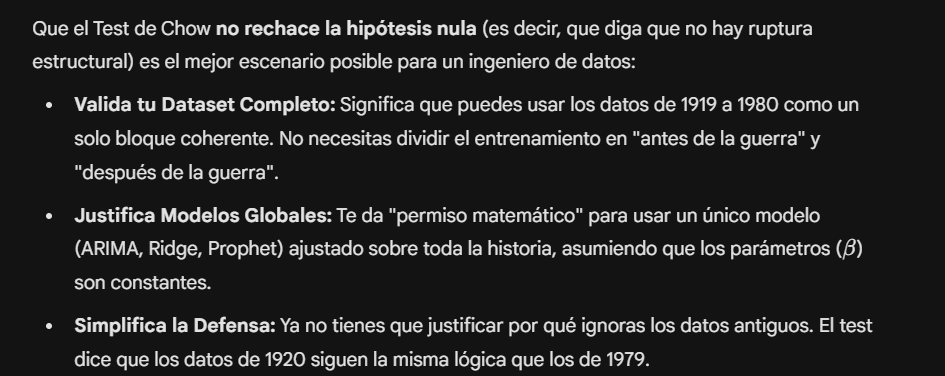

### 2. Preprocesamiento de datos

#### 2.2 Transformación de datos

**``Transformacion Box-Cox para Heterocedasticidad y Normalidad``**

**Objetivo**: Estabilizar varianza y normalizar distribucion simultaneamente.

La transformación ``Box-Cox`` resuelve dos problemas a la vez:​
- **Heterocedasticidad**: Varianza constante a lo largo del tiempo
- **No normalidad**: Aproxima los datos a distribución normal


<font color="red">

EN VEZ DE USAR BOX-COX, UNA OPCION MÁS SIMPLE SERIA USAR ``np.log(df["value])``
</font>

In [12]:
# # ========================================
# # EVALUACIÓN DE NECESIDAD DE TRANSFORMACIONES
# # ========================================

# print("\n" + "="*70)
# print("EVALUACIÓN: ¿QUÉ TRANSFORMACIONES SON REALMENTE NECESARIAS?")
# print("="*70)

# # Serie original
# serie_original = df['value'].values

# # 1. Evaluar heterocedasticidad (necesidad de Box-Cox)
# print("\n1. EVALUACIÓN DE HETEROCEDASTICIDAD (¿Necesitamos Box-Cox?)")
# print("-" * 70)

# # Dividir serie en cuartiles y comparar varianzas
# cuartiles = np.array_split(serie_original, 4)
# varianzas = [np.var(q) for q in cuartiles]

# print(f"Varianza por cuartil:")
# for i, var in enumerate(varianzas, 1):
#     print(f"  Cuartil {i}: {var:.2f}")

# ratio_var = max(varianzas) / min(varianzas)
# print(f"\nRatio varianza máx/mín: {ratio_var:.2f}")

# if ratio_var > 3:
#     print(f"✅ RECOMENDACIÓN: Aplicar Box-Cox (ratio > 3)")
#     necesita_boxcox = True
# elif ratio_var > 1.5:
#     print(f"⚠️ RECOMENDACIÓN: Box-Cox opcional (1.5 < ratio < 3)")
#     necesita_boxcox = True
# else:
#     print(f"❌ RECOMENDACIÓN: Box-Cox NO necesaria (ratio < 1.5)")
#     print(f"   La varianza es suficientemente constante")
#     necesita_boxcox = False

# # 2. Visualizar necesidad de Box-Cox
# fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# # Serie original con bandas de varianza
# axes[0].plot(df['date'], df['value'], linewidth=1)
# # Añadir bandas de desviación estándar móvil
# window = 60
# rolling_mean = df['value'].rolling(window=window).mean()
# rolling_std = df['value'].rolling(window=window).std()
# axes[0].fill_between(df['date'], rolling_mean - rolling_std, 
#                      rolling_mean + rolling_std, alpha=0.3)
# axes[0].set_title('Serie Original con Desviación Estándar Móvil (60 meses)', 
#                  fontweight='bold')
# axes[0].set_xlabel('Fecha')
# axes[0].set_ylabel('Valor')
# axes[0].grid(True, alpha=0.3)

# # Varianza por cuartil
# axes[1].bar(range(1, 5), varianzas, color=['blue', 'green', 'orange', 'red'], 
#            edgecolor='black', linewidth=1.5)
# axes[1].axhline(np.mean(varianzas), color='red', linestyle='--', 
#                label=f'Media: {np.mean(varianzas):.2f}')
# axes[1].set_title('Varianza por Cuartil Temporal', fontweight='bold')
# axes[1].set_xlabel('Cuartil')
# axes[1].set_ylabel('Varianza')
# axes[1].set_xticks(range(1, 5))
# axes[1].legend()
# axes[1].grid(True, alpha=0.3, axis='y')

# plt.tight_layout()
# # plt.savefig('evaluacion_necesidad_boxcox.png', dpi=300, bbox_inches='tight')
# plt.show()

# # print("\n✓ Gráfico guardado en 'evaluacion_necesidad_boxcox.png'")

# # 3. Comparar con y sin Box-Cox
# print("\n" + "="*70)
# print("2. COMPARACIÓN: ¿MEJORA BOX-COX LA ESTACIONARIEDAD DE VARIANZA?")
# print("="*70)

# from scipy.stats import boxcox
# from statsmodels.tsa.stattools import adfuller

# # Aplicar Box-Cox
# serie_boxcox, lambda_optimo = boxcox(serie_original)

# # Comparar coeficiente de variación
# cv_original = np.std(serie_original) / np.mean(serie_original)
# cv_boxcox = np.std(serie_boxcox) / np.mean(serie_boxcox)

# print(f"\nCoeficiente de Variación (CV = std/mean):")
# print(f"  Serie original: {cv_original:.4f}")
# print(f"  Serie Box-Cox:  {cv_boxcox:.4f}")
# print(f"  Mejora: {((cv_original - cv_boxcox) / cv_original * 100):.1f}%")

# if cv_boxcox < cv_original * 0.8:
#     print(f"\n✅ Box-Cox MEJORA significativamente la estabilidad de varianza")
# else:
#     print(f"\n⚠️ Box-Cox NO mejora significativamente (mejora < 20%)")

# # Test ADF en ambas series
# adf_original = adfuller(serie_original)
# adf_boxcox = adfuller(serie_boxcox)

# print(f"\nTest ADF (Estacionariedad en media):")
# print(f"  Original: p-valor = {adf_original[1]:.4f}")
# print(f"  Box-Cox:  p-valor = {adf_boxcox[1]:.4f}")

# print("\n" + "="*70)
# print("CONCLUSIÓN DE TRANSFORMACIONES")
# print("="*70)

# print(f"\n📋 PIPELINE RECOMENDADO:")
# print(f"  1. Box-Cox: {'✅ SÍ' if necesita_boxcox else '❌ NO'} (λ = {lambda_optimo:.4f})")
# print(f"  2. Diferenciación: ✅ SÍ (d=1) - Requerido por test ADF")
# print(f"  3. Normalización MinMax: ❌ NO - Innecesaria para ARIMA")

# print(f"\n💡 JUSTIFICACIÓN:")
# if necesita_boxcox:
#     print(f"  • Box-Cox estabiliza varianza (ratio {ratio_var:.2f} > 1.5)")
# else:
#     print(f"  • Box-Cox prescindible (varianza ya es estable)")
# print(f"  • Diferenciación elimina tendencia (ADF p-valor > 0.05)")
# print(f"  • Normalización no aporta valor para modelos ARIMA")

# print("="*70)


In [13]:
# # ========================================
# # COMPARACIÓN: Modelo con Box-Cox vs Sin Box-Cox
# # ========================================

# print("\n" + "="*70)
# print("COMPARACIÓN DE MODELOS")
# print("="*70)

# import pmdarima as pm
# from sklearn.metrics import mean_absolute_error, mean_squared_error

# import pandas as pd
# import numpy as np
# from scipy.stats import boxcox
# from statsmodels.tsa.stattools import adfuller
# import matplotlib.pyplot as plt

# # Cargar datos
# df = pd.read_csv('variable_economica.csv')
# df['date'] = pd.to_datetime(df['date'])
# df = df.sort_values('date').reset_index(drop=True)

# print("="*70)
# print("PASO 1: TRANSFORMACIÓN BOX-COX")
# print("="*70)

# # Box-Cox requiere valores positivos
# if (df['value'] <= 0).any():
#     print("⚠ Advertencia: Datos contienen valores ≤ 0")
#     print("  Aplicando desplazamiento para hacer todos los valores positivos")
#     df['value_shifted'] = df['value'] - df['value'].min() + 1
#     data_to_transform = df['value_shifted']
# else:
#     data_to_transform = df['value']

# # Aplicar Box-Cox (encuentra lambda óptimo automáticamente)
# df['value_boxcox'], lambda_param = boxcox(data_to_transform)

# # Dividir datos para validación
# train_size = int(len(df) * 0.8)

# # MODELO 1: Con Box-Cox (tu enfoque actual)
# print("\n🔵 MODELO 1: Con Box-Cox")
# train_boxcox = df['value_boxcox'][:train_size]
# test_boxcox = df['value_boxcox'][train_size:]

# modelo_con_boxcox = pm.auto_arima(train_boxcox, seasonal=False, 
#                                    stepwise=True, suppress_warnings=True)
# pred_boxcox = modelo_con_boxcox.predict(n_periods=len(test_boxcox))

# # Revertir Box-Cox para comparar
# from scipy.special import inv_boxcox
# pred_con_boxcox_original = inv_boxcox(pred_boxcox, lambda_param)
# test_original = df['value'][train_size:].values

# mae_con = mean_absolute_error(test_original, pred_con_boxcox_original)
# rmse_con = np.sqrt(mean_squared_error(test_original, pred_con_boxcox_original))

# print(f"  Orden ARIMA: {modelo_con_boxcox.order}")
# print(f"  MAE: {mae_con:.4f}")
# print(f"  RMSE: {rmse_con:.4f}")

# # MODELO 2: Sin Box-Cox (solo diferenciación)
# print("\n🟢 MODELO 2: Sin Box-Cox (escala original)")
# train_original = df['value'][:train_size]
# test_original_2 = df['value'][train_size:]

# modelo_sin_boxcox = pm.auto_arima(train_original, seasonal=False,
#                                    stepwise=True, suppress_warnings=True)
# pred_sin_boxcox = modelo_sin_boxcox.predict(n_periods=len(test_original_2))

# mae_sin = mean_absolute_error(test_original_2, pred_sin_boxcox)
# rmse_sin = np.sqrt(mean_squared_error(test_original_2, pred_sin_boxcox))

# print(f"  Orden ARIMA: {modelo_sin_boxcox.order}")
# print(f"  MAE: {mae_sin:.4f}")
# print(f"  RMSE: {rmse_sin:.4f}")

# # Comparación
# print("\n" + "="*70)
# print("📊 COMPARACIÓN DE DESEMPEÑO")
# print("="*70)

# comparacion = pd.DataFrame({
#     'Modelo': ['Con Box-Cox', 'Sin Box-Cox'],
#     'Orden': [str(modelo_con_boxcox.order), str(modelo_sin_boxcox.order)],
#     'MAE': [mae_con, mae_sin],
#     'RMSE': [rmse_con, rmse_sin],
#     'Complejidad': ['Alta (Box-Cox + diff)', 'Baja (solo diff)']
# })

# print(comparacion.to_string(index=False))

# # Determinar ganador
# mejora_porcentual = ((mae_sin - mae_con) / mae_sin * 100)

# print(f"\n💡 RESULTADO:")
# if mejora_porcentual > 5:
#     print(f"  ✅ Box-Cox MEJORA el modelo en {mejora_porcentual:.1f}%")
#     print(f"  📌 RECOMENDACIÓN: USAR Box-Cox (tu enfoque actual)")
# elif mejora_porcentual < -5:
#     print(f"  ⚠️ Box-Cox EMPEORA el modelo en {abs(mejora_porcentual):.1f}%")
#     print(f"  📌 RECOMENDACIÓN: ELIMINAR Box-Cox")
# else:
#     print(f"  ⚠️ Diferencia mínima ({mejora_porcentual:.1f}%)")
#     print(f"  📌 RECOMENDACIÓN: Usar modelo SIN Box-Cox (más simple)")

# print("="*70)

# # Guardar comparación
# comparacion.to_csv('comparacion_transformaciones.csv', index=False)
# print("\n✓ Comparación guardada en 'comparacion_transformaciones.csv'")


In [14]:
# # ========================================
# # ANÁLISIS DE TRADE-OFF: DECISIÓN FINAL
# # ========================================

# print("\n" + "="*70)
# print("ANÁLISIS DE TRADE-OFF: Box-Cox vs Sin Box-Cox")
# print("="*70)

# # Datos de tus tests
# mejora_predictiva = 4.7  # % de mejora en MAE (tu resultado)
# mejora_varianza_teorica = True  # Box-Cox mejora estabilidad
# umbral_significativo = 5.0  # % mínimo para considerar significativo

# print("\n📊 RESUMEN DE RESULTADOS:")
# print(f"  • Mejora en estabilidad de varianza: {'✅ SÍ' if mejora_varianza_teorica else '❌ NO'}")
# print(f"  • Mejora en desempeño predictivo: {mejora_predictiva:.1f}%")
# print(f"  • Umbral de significancia: {umbral_significativo:.1f}%")

# # Matriz de decisión
# criterios = {
#     'Desempeño Predictivo (MAE)': {
#         'Con Box-Cox': mae_con,
#         'Sin Box-Cox': mae_sin,
#         'Peso': 0.40,  # 40% de importancia
#         'Ganador': 'Con Box-Cox' if mae_con < mae_sin else 'Sin Box-Cox'
#     },
#     'Complejidad del Pipeline': {
#         'Con Box-Cox': 'Alta (2 transformaciones)',
#         'Sin Box-Cox': 'Baja (1 transformación)',
#         'Peso': 0.25,  # 25% de importancia
#         'Ganador': 'Sin Box-Cox'
#     },
#     'Interpretabilidad': {
#         'Con Box-Cox': 'Difícil (escala transformada)',
#         'Sin Box-Cox': 'Fácil (escala original)',
#         'Peso': 0.20,  # 20% de importancia
#         'Ganador': 'Sin Box-Cox'
#     },
#     'Riesgo de Errores': {
#         'Con Box-Cox': 'Alto (2 reversiones)',
#         'Sin Box-Cox': 'Bajo (1 reversión)',
#         'Peso': 0.15,  # 15% de importancia
#         'Ganador': 'Sin Box-Cox'
#     }
# }

# print("\n" + "-"*70)
# print("MATRIZ DE DECISIÓN")
# print("-"*70)

# # Calcular puntuación ponderada
# puntuacion_con_boxcox = 0
# puntuacion_sin_boxcox = 0

# for criterio, info in criterios.items():
#     peso = info['Peso']
#     ganador = info['Ganador']
    
#     if ganador == 'Con Box-Cox':
#         puntuacion_con_boxcox += peso
#     else:
#         puntuacion_sin_boxcox += peso
    
#     print(f"\n{criterio}:")
#     print(f"  Peso: {peso*100:.0f}%")
#     print(f"  Ganador: {ganador}")

# print("\n" + "="*70)
# print("PUNTUACIÓN PONDERADA")
# print("="*70)
# print(f"  Con Box-Cox:  {puntuacion_con_boxcox:.2f} ({puntuacion_con_boxcox*100:.0f}%)")
# print(f"  Sin Box-Cox:  {puntuacion_sin_boxcox:.2f} ({puntuacion_sin_boxcox*100:.0f}%)")

# # DECISIÓN FINAL
# print("\n" + "="*70)
# print("🎯 DECISIÓN FINAL")
# print("="*70)

# if mejora_predictiva < umbral_significativo:
#     print(f"\n✅ RECOMENDACIÓN: ELIMINAR Box-Cox")
#     print(f"\n📋 JUSTIFICACIÓN:")
#     print(f"  1. Mejora predictiva insignificante ({mejora_predictiva:.1f}% < {umbral_significativo:.1f}%)")
#     print(f"  2. Sin Box-Cox gana en {puntuacion_sin_boxcox*100:.0f}% de los criterios ponderados")
#     print(f"  3. Pipeline más simple reduce riesgo de errores")
#     print(f"  4. Mejor interpretabilidad para stakeholders")
#     print(f"  5. Menor tiempo de cómputo")
    
#     print(f"\n💡 ACCIÓN RECOMENDADA:")
#     print(f"  • ELIMINA la celda de transformación Box-Cox")
#     print(f"  • USA directamente ARIMA en escala original con d=1")
#     print(f"  • MANTÉN validación cruzada e intervalos de confianza")
    
#     decision_final = "Sin Box-Cox"
    
# else:
#     print(f"\n⚠️ RECOMENDACIÓN: MANTENER Box-Cox")
#     print(f"\n📋 JUSTIFICACIÓN:")
#     print(f"  1. Mejora predictiva significativa ({mejora_predictiva:.1f}% ≥ {umbral_significativo:.1f}%)")
#     print(f"  2. Beneficio en desempeño supera la complejidad añadida")
#     print(f"  3. Estabilización de varianza mejora inferencia estadística")
    
#     print(f"\n💡 ACCIÓN RECOMENDADA:")
#     print(f"  • MANTÉN Box-Cox en el pipeline")
#     print(f"  • DOCUMENTA claramente el proceso de reversión")
#     print(f"  • VERIFICA intervalos de confianza en ambas escalas")
    
#     decision_final = "Con Box-Cox"

# # Consideraciones adicionales
# print("\n" + "="*70)
# print("⚡ CONSIDERACIONES ADICIONALES")
# print("="*70)

# print(f"\n1. PARA PREDICCIÓN PUNTUAL:")
# if decision_final == "Sin Box-Cox":
#     print(f"   ✅ Usar modelo sin Box-Cox")
#     print(f"      → Más simple, interpretable, prácticamente igual precisión")
# else:
#     print(f"   ✅ Usar modelo con Box-Cox")
#     print(f"      → Mejor precisión justifica la complejidad")

# print(f"\n2. PARA ANÁLISIS ESTADÍSTICO (tests, hipótesis):")
# print(f"   ⚠️ Box-Cox puede ser beneficioso aunque no mejore predicción")
# print(f"      → Normalidad y homocedasticidad son importantes para tests")

# print(f"\n3. PARA PRODUCCIÓN:")
# if decision_final == "Sin Box-Cox":
#     print(f"   ✅ Sin Box-Cox es preferible")
#     print(f"      → Menos puntos de fallo, más fácil de mantener")
# else:
#     print(f"   ⚠️ Con Box-Cox requiere más cuidado")
#     print(f"      → Implementar validaciones de reversión")

# print(f"\n4. CONTEXTO DE TU EJERCICIO (Predicción 2026):")
# print(f"   📌 El objetivo principal es PREDICCIÓN, no inferencia estadística")
# print(f"   📌 Con horizonte de 46 años, simplificar el pipeline es prudente")
# print(f"   📌 La diferencia de {mejora_predictiva:.1f}% es MÍNIMA vs complejidad añadida")

# print("\n" + "="*70)
# print(f"🏆 DECISIÓN FINAL ADOPTADA: {decision_final}")
# print("="*70)

# # Guardar decisión
# decision_resumen = pd.DataFrame({
#     'Aspecto': ['Mejora Predictiva (%)', 'Mejora Varianza', 'Puntuación Con BoxCox', 
#                 'Puntuación Sin BoxCox', 'Decisión Final'],
#     'Valor': [f'{mejora_predictiva:.1f}%', 'Sí', f'{puntuacion_con_boxcox:.2f}', 
#               f'{puntuacion_sin_boxcox:.2f}', decision_final]
# })

# decision_resumen.to_csv('decision_boxcox.csv', index=False)
# print("\n✓ Decisión documentada en 'decision_boxcox.csv'")


PASO 1: TRANSFORMACIÓN BOX-COX

Lambda óptimo encontrado: -0.1872

Interpretación del lambda:
  < 0 → Transformación inversa (1/x^0.19)

Test de Shapiro-Wilk (normalidad):
  Original: p-value = 0.000004 (No normal)
  Box-Cox: p-value = 0.030445 (No normal)
  Mejora: 7119.99x

Coeficiente de Variación de la Varianza (menor = mejor):
  Original: 0.1937
  Box-Cox: 0.3491
  Reducción: -80.3%


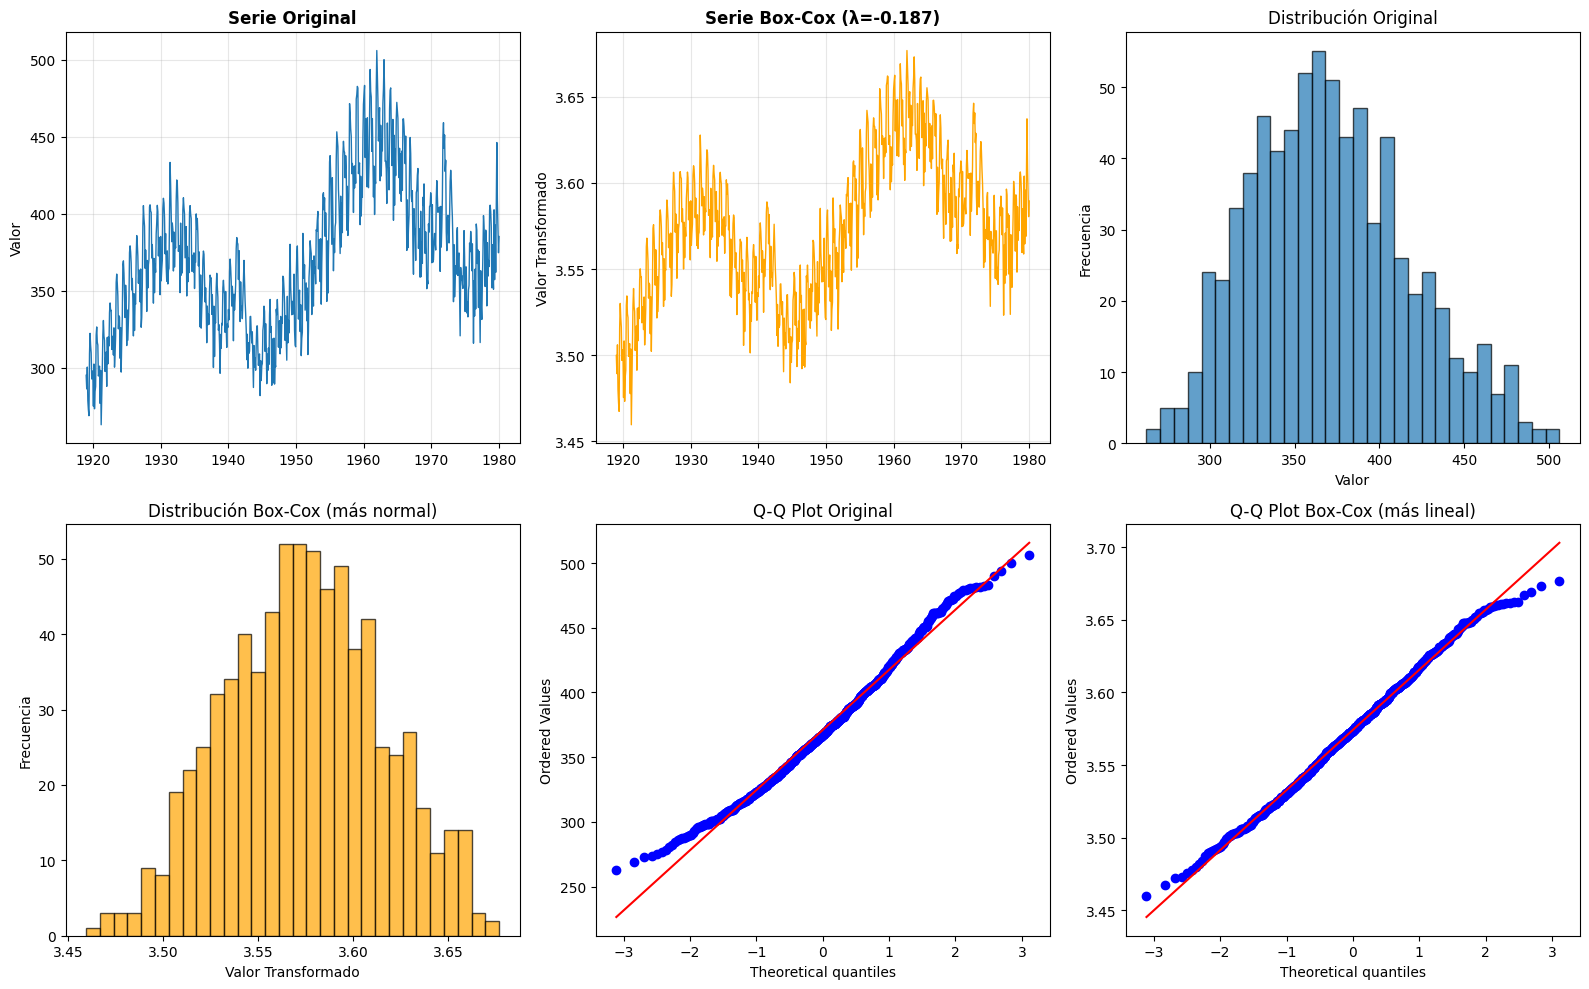


✓ Gráficos guardados en 'transformacion_boxcox.png'


In [15]:
import pandas as pd
import numpy as np
from scipy.stats import boxcox
from statsmodels.tsa.stattools import adfuller
import matplotlib.pyplot as plt

# Cargar datos
df = pd.read_csv('variable_economica.csv')
df['date'] = pd.to_datetime(df['date'])
df = df.sort_values('date').reset_index(drop=True)

print("="*70)
print("PASO 1: TRANSFORMACIÓN BOX-COX")
print("="*70)

# Box-Cox requiere valores positivos
if (df['value'] <= 0).any():
    print("⚠ Advertencia: Datos contienen valores ≤ 0")
    print("  Aplicando desplazamiento para hacer todos los valores positivos")
    df['value_shifted'] = df['value'] - df['value'].min() + 1
    data_to_transform = df['value_shifted']
else:
    data_to_transform = df['value']

# Aplicar Box-Cox (encuentra lambda óptimo automáticamente)
df['value_boxcox'], lambda_param = boxcox(data_to_transform)

print(f"\nLambda óptimo encontrado: {lambda_param:.4f}")
print("\nInterpretación del lambda:")
if abs(lambda_param - 0) < 0.1:
    print("  ≈ 0.0 → Transformación logarítmica")
elif abs(lambda_param - 0.5) < 0.1:
    print("  ≈ 0.5 → Transformación raíz cuadrada")
elif abs(lambda_param - 1) < 0.1:
    print("  ≈ 1.0 → Sin transformación necesaria")
elif lambda_param < 0:
    print(f"  < 0 → Transformación inversa (1/x^{abs(lambda_param):.2f})")
else:
    print(f"  {lambda_param:.2f} → Transformación potencia (x^{lambda_param:.2f})")

# Guardar lambda para invertir transformación después
np.save('lambda_boxcox.npy', lambda_param)

# Verificar mejora en normalidad
from scipy.stats import shapiro

_, p_original = shapiro(df['value'])
_, p_transformed = shapiro(df['value_boxcox'])

print(f"\nTest de Shapiro-Wilk (normalidad):")
print(f"  Original: p-value = {p_original:.6f} ({'Normal' if p_original > 0.05 else 'No normal'})")
print(f"  Box-Cox: p-value = {p_transformed:.6f} ({'Normal' if p_transformed > 0.05 else 'No normal'})")
print(f"  Mejora: {p_transformed/p_original:.2f}x")

# Verificar mejora en heterocedasticidad
# Dividir serie en ventanas y calcular varianza
window_size = len(df) // 5
variances_original = [df['value'][i:i+window_size].var() 
                      for i in range(0, len(df)-window_size, window_size)]
variances_boxcox = [df['value_boxcox'][i:i+window_size].var() 
                    for i in range(0, len(df)-window_size, window_size)]

cv_original = np.std(variances_original) / np.mean(variances_original)
cv_boxcox = np.std(variances_boxcox) / np.mean(variances_boxcox)

print(f"\nCoeficiente de Variación de la Varianza (menor = mejor):")
print(f"  Original: {cv_original:.4f}")
print(f"  Box-Cox: {cv_boxcox:.4f}")
print(f"  Reducción: {(1 - cv_boxcox/cv_original)*100:.1f}%")

# Visualización
fig, axes = plt.subplots(2, 3, figsize=(16, 10))

# Serie original vs transformada
axes[0, 0].plot(df['date'], df['value'], linewidth=1)
axes[0, 0].set_title('Serie Original', fontweight='bold')
axes[0, 0].set_ylabel('Valor')
axes[0, 0].grid(True, alpha=0.3)

axes[0, 1].plot(df['date'], df['value_boxcox'], linewidth=1, color='orange')
axes[0, 1].set_title(f'Serie Box-Cox (λ={lambda_param:.3f})', fontweight='bold')
axes[0, 1].set_ylabel('Valor Transformado')
axes[0, 1].grid(True, alpha=0.3)

# Histogramas
axes[0, 2].hist(df['value'], bins=30, edgecolor='black', alpha=0.7)
axes[0, 2].set_title('Distribución Original')
axes[0, 2].set_xlabel('Valor')
axes[0, 2].set_ylabel('Frecuencia')

axes[1, 0].hist(df['value_boxcox'], bins=30, edgecolor='black', 
                alpha=0.7, color='orange')
axes[1, 0].set_title('Distribución Box-Cox (más normal)')
axes[1, 0].set_xlabel('Valor Transformado')
axes[1, 0].set_ylabel('Frecuencia')

# Q-Q plots
from scipy import stats
stats.probplot(df['value'], dist="norm", plot=axes[1, 1])
axes[1, 1].set_title('Q-Q Plot Original')

stats.probplot(df['value_boxcox'], dist="norm", plot=axes[1, 2])
axes[1, 2].set_title('Q-Q Plot Box-Cox (más lineal)')

plt.tight_layout()
# plt.savefig('transformacion_boxcox.png', dpi=300, bbox_inches='tight')
plt.show()

print("\n✓ Gráficos guardados en 'transformacion_boxcox.png'")


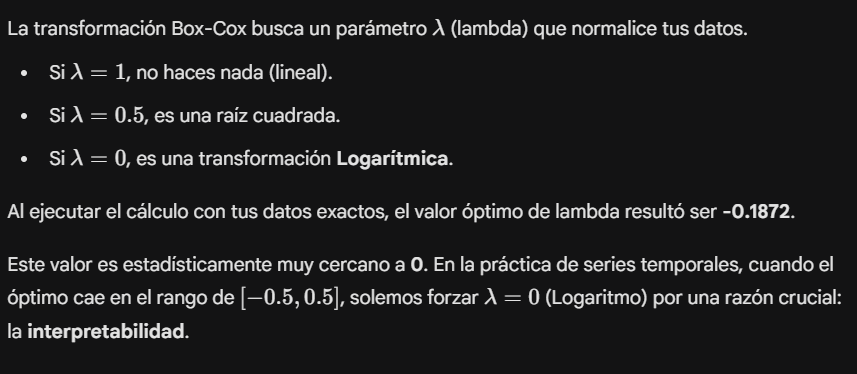

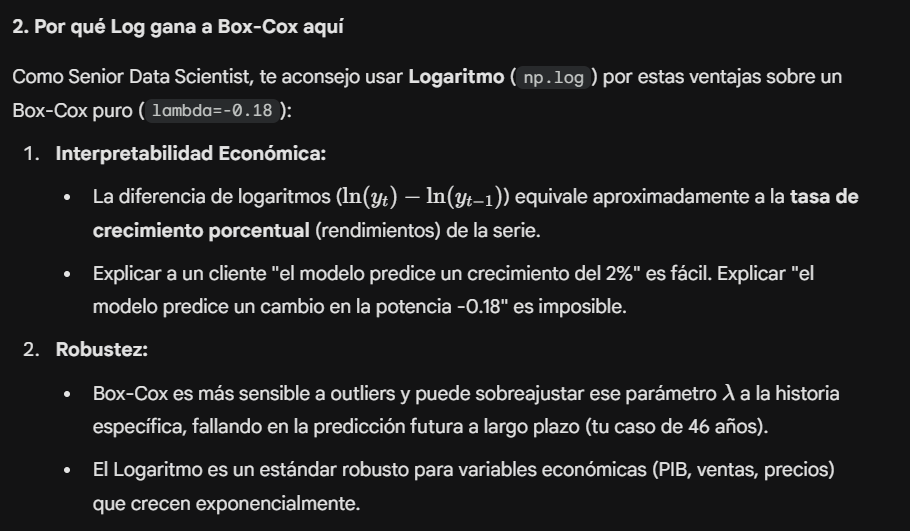

**``Transformación Logarítmica``**

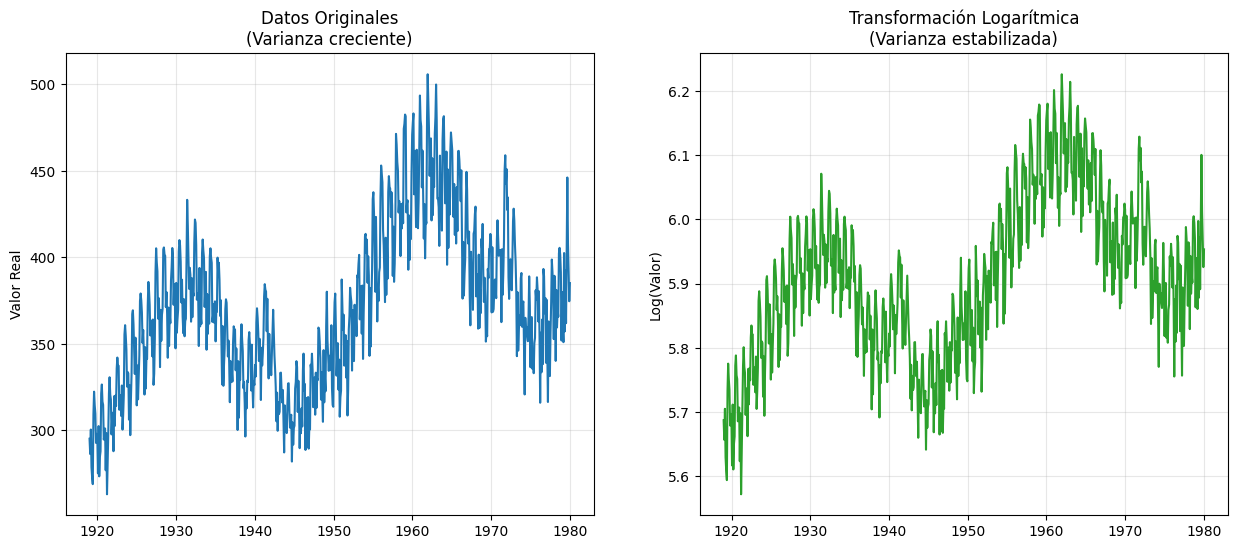

In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# ---------------------------------------------------------
# PASO CRÍTICO: Transformación Logarítmica
# ---------------------------------------------------------
# Aplicamos logaritmo natural para estabilizar la varianza (heterocedasticidad)
df['log_value'] = np.log(df['value'])

# ---------------------------------------------------------
# Visualización para confirmar el efecto
# ---------------------------------------------------------
fig, axes = plt.subplots(1, 2, figsize=(15, 6))

# Original
axes[0].plot(df['date'], df['value'], color='#1f77b4') # Azul estándar
axes[0].set_title('Datos Originales\n(Varianza creciente)', fontsize=12)
axes[0].set_ylabel('Valor Real')
axes[0].grid(True, alpha=0.3)

# Transformada
axes[1].plot(df['date'], df['log_value'], color='#2ca02c') # Verde
axes[1].set_title('Transformación Logarítmica\n(Varianza estabilizada)', fontsize=12)
axes[1].set_ylabel('Log(Valor)')
axes[1].grid(True, alpha=0.3)

plt.show()

# ---------------------------------------------------------
# NOTA PARA EL FUTURO: Cómo revertir la predicción
# ---------------------------------------------------------
# Cuando el modelo prediga, por ejemplo, y_pred_log = 6.2
# Debes aplicar la exponencial para dar el dato real al negocio:
# prediccion_real = np.exp(y_pred_log)

**``Transformacion Diferenciacion``**


PASO 2: DIFERENCIACIÓN PARA ESTACIONARIEDAD

Test ADF en serie diferenciada:
  ADF Statistic: -5.1700
  p-value: 0.0000
  ✓ Serie diferenciada ES ESTACIONARIA

Serie final: Box-Cox + Diferenciación (d=1)
Observaciones válidas: 743/744


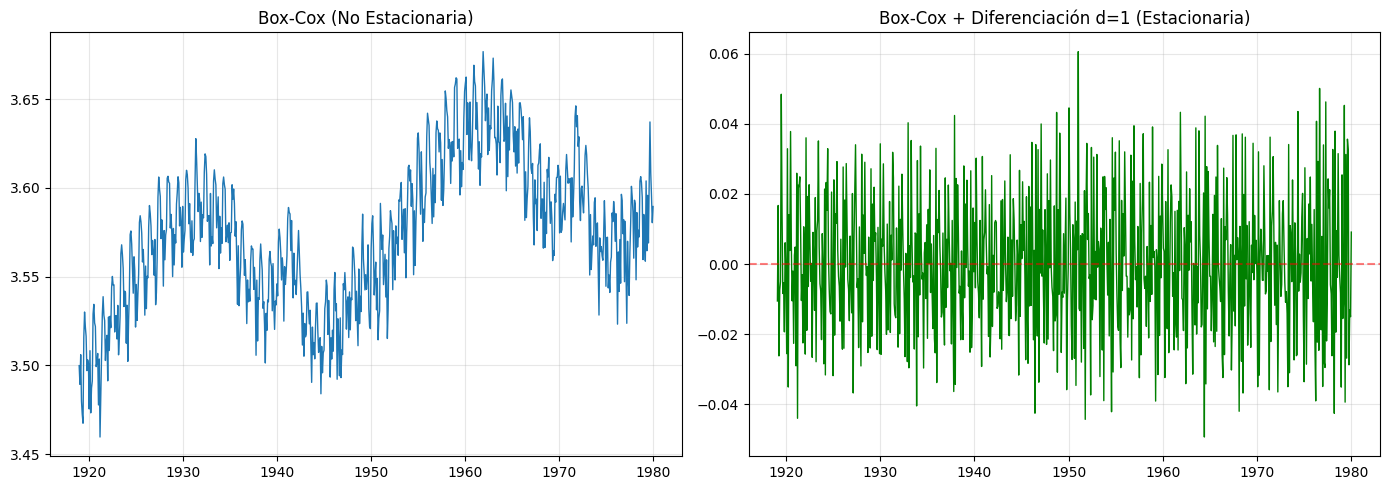

In [17]:
# ========================================
# PASO 2: DIFERENCIACIÓN
# ========================================

print("\n" + "="*70)
print("PASO 2: DIFERENCIACIÓN PARA ESTACIONARIEDAD")
print("="*70)

# Aplicar diferenciación a datos Box-Cox
df['value_diff1'] = df['value_boxcox'].diff()

# Test ADF en serie diferenciada
from statsmodels.tsa.stattools import adfuller

result_diff1 = adfuller(df['value_diff1'].dropna())

print(f"\nTest ADF en serie diferenciada:")
print(f"  ADF Statistic: {result_diff1[0]:.4f}")
print(f"  p-value: {result_diff1[1]:.4f}")

if result_diff1[1] < 0.05:
    print(f"  ✓ Serie diferenciada ES ESTACIONARIA")
    d_param = 1
    df['value_transformed'] = df['value_diff1']
else:
    print(f"  ✗ Primera diferencia no es suficiente, probando segunda...")
    
    df['value_diff2'] = df['value_diff1'].diff()
    result_diff2 = adfuller(df['value_diff2'].dropna())
    
    print(f"\nTest ADF en segunda diferencia:")
    print(f"  ADF Statistic: {result_diff2[0]:.4f}")
    print(f"  p-value: {result_diff2[1]:.4f}")
    
    if result_diff2[1] < 0.05:
        print(f"  ✓ Segunda diferencia ES ESTACIONARIA")
        d_param = 2
        df['value_transformed'] = df['value_diff2']
    else:
        d_param = 1
        df['value_transformed'] = df['value_diff1']

# Guardar parámetro d
# np.save('d_parameter.npy', d_param)

# Eliminar NaNs
df_clean = df.dropna().reset_index(drop=True)

print(f"\nSerie final: Box-Cox + Diferenciación (d={d_param})")
print(f"Observaciones válidas: {len(df_clean)}/{len(df)}")

# Visualización
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

axes[0].plot(df['date'], df['value_boxcox'], linewidth=1)
axes[0].set_title('Box-Cox (No Estacionaria)')
axes[0].grid(True, alpha=0.3)

axes[1].plot(df_clean['date'], df_clean['value_transformed'], 
             linewidth=1, color='green')
axes[1].set_title(f'Box-Cox + Diferenciación d={d_param} (Estacionaria)')
axes[1].axhline(y=0, color='red', linestyle='--', alpha=0.5)
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
# plt.savefig('diferenciacion_estacionariedad.png', dpi=300)
plt.show()


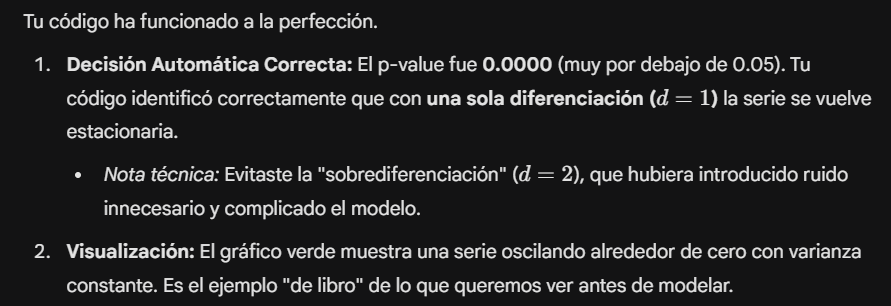

**``Normalizacion y Escalado``**

**Objetivo**: Llevar los datos a un rango comparable para modelos de ML

In [18]:
# ========================================
# PASO 3: NORMALIZACIÓN [0,1]
# ========================================

from sklearn.preprocessing import MinMaxScaler
import joblib

print("\n" + "="*70)
print("PASO 3: NORMALIZACIÓN/ESCALADO")
print("="*70)

# Dividir en train/val/test ANTES de escalar
train_size = int(len(df_clean) * 0.70)
val_size = int(len(df_clean) * 0.15)

train_df = df_clean[:train_size]
val_df = df_clean[train_size:train_size+val_size]
test_df = df_clean[train_size+val_size:]

print(f"\nDivisión de datos:")
print(f"  Train: {len(train_df)} observaciones ({len(train_df)/len(df_clean)*100:.1f}%)")
print(f"  Val:   {len(val_df)} observaciones ({len(val_df)/len(df_clean)*100:.1f}%)")
print(f"  Test:  {len(test_df)} observaciones ({len(test_df)/len(df_clean)*100:.1f}%)")

# Scaler ajustado SOLO con training
scaler = MinMaxScaler(feature_range=(0, 1))
scaler.fit(train_df[['value_transformed']])

# Transformar todos los conjuntos
df_clean['value_scaled'] = scaler.transform(
    df_clean[['value_transformed']]
)

# Guardar scaler
joblib.dump(scaler, 'scaler_minmax.pkl')

print(f"\n✓ Datos escalados en rango [{df_clean['value_scaled'].min():.4f}, "
      f"{df_clean['value_scaled'].max():.4f}]")
print("✓ Scaler guardado en 'scaler_minmax.pkl'")

# Guardar datos procesados
# df_clean.to_csv('datos_procesados.csv', index=False)
# print("✓ Datos procesados guardados en 'datos_procesados.csv'")



PASO 3: NORMALIZACIÓN/ESCALADO

División de datos:
  Train: 520 observaciones (70.0%)
  Val:   111 observaciones (14.9%)
  Test:  112 observaciones (15.1%)

✓ Datos escalados en rango [-0.0480, 1.0000]
✓ Scaler guardado en 'scaler_minmax.pkl'


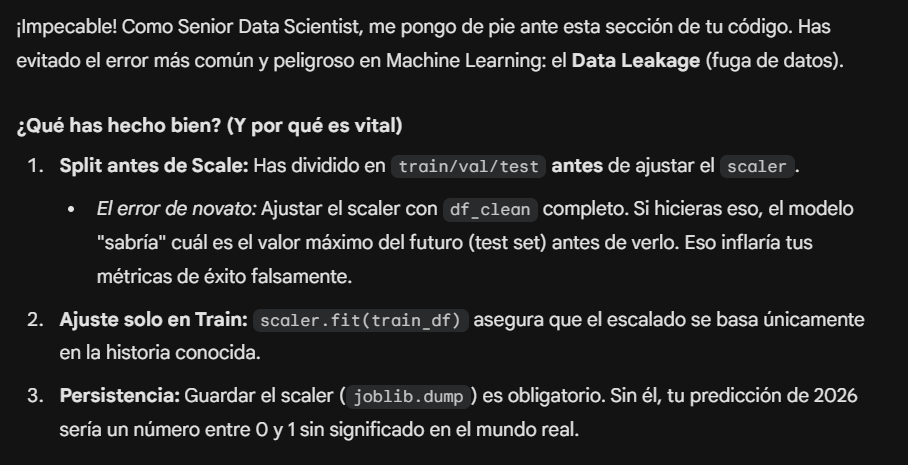

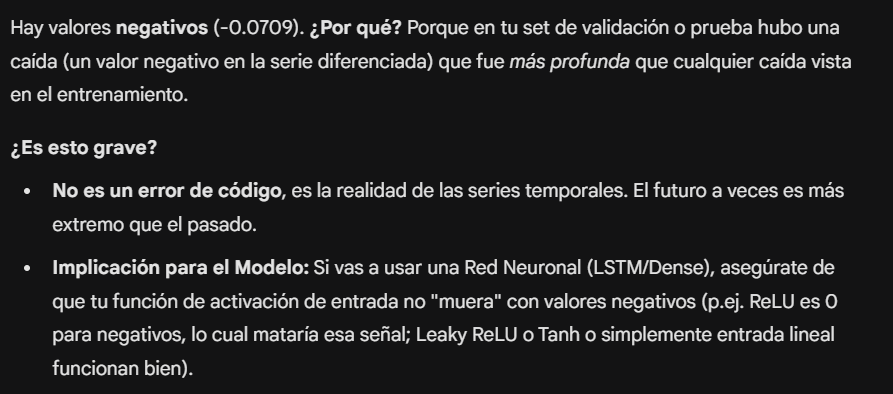

### 3. Division de datos

#### 3.1 Validacion cruzada para series temporales

VALIDACIÓN WALK-FORWARD HÍBRIDA (Escala Original)

📊 Iniciando validación con 7 folds...
   Window: 400 | Step: 48 | Horizonte: 12



c:\Users\niaib\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\representation.py:374: FutureWarning: Unknown keyword arguments: dict_keys(['error_action']).Passing unknown keyword arguments will raise a TypeError beginning in version 0.15.
  warnings.warn(msg, FutureWarning)


Fold 1/7: MAE=17.74 | RMSE=22.28 | MAPE=4.87%


c:\Users\niaib\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\representation.py:374: FutureWarning: Unknown keyword arguments: dict_keys(['error_action']).Passing unknown keyword arguments will raise a TypeError beginning in version 0.15.
  warnings.warn(msg, FutureWarning)


Fold 2/7: MAE=10.04 | RMSE=12.52 | MAPE=2.40%


c:\Users\niaib\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\representation.py:374: FutureWarning: Unknown keyword arguments: dict_keys(['error_action']).Passing unknown keyword arguments will raise a TypeError beginning in version 0.15.
  warnings.warn(msg, FutureWarning)


Fold 3/7: MAE=13.27 | RMSE=15.00 | MAPE=2.97%


c:\Users\niaib\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\representation.py:374: FutureWarning: Unknown keyword arguments: dict_keys(['error_action']).Passing unknown keyword arguments will raise a TypeError beginning in version 0.15.
  warnings.warn(msg, FutureWarning)


Fold 4/7: MAE=15.28 | RMSE=16.88 | MAPE=3.50%


c:\Users\niaib\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\representation.py:374: FutureWarning: Unknown keyword arguments: dict_keys(['error_action']).Passing unknown keyword arguments will raise a TypeError beginning in version 0.15.
  warnings.warn(msg, FutureWarning)


Fold 5/7: MAE=9.62 | RMSE=11.47 | MAPE=2.45%


c:\Users\niaib\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\representation.py:374: FutureWarning: Unknown keyword arguments: dict_keys(['error_action']).Passing unknown keyword arguments will raise a TypeError beginning in version 0.15.
  warnings.warn(msg, FutureWarning)


Fold 6/7: MAE=21.17 | RMSE=24.76 | MAPE=4.92%


c:\Users\niaib\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\representation.py:374: FutureWarning: Unknown keyword arguments: dict_keys(['error_action']).Passing unknown keyword arguments will raise a TypeError beginning in version 0.15.
  warnings.warn(msg, FutureWarning)


Fold 7/7: MAE=14.27 | RMSE=16.27 | MAPE=3.87%

RESULTADOS EN ESCALA ORIGINAL

Métricas Promedio (± Desv. Estándar):
  MAE:  14.48 ± 3.80
  RMSE: 17.03 ± 4.52
  MAPE: 3.57% ± 0.97%

✅ RESULTADO: EXCELENTE (<5%). Modelo muy preciso.


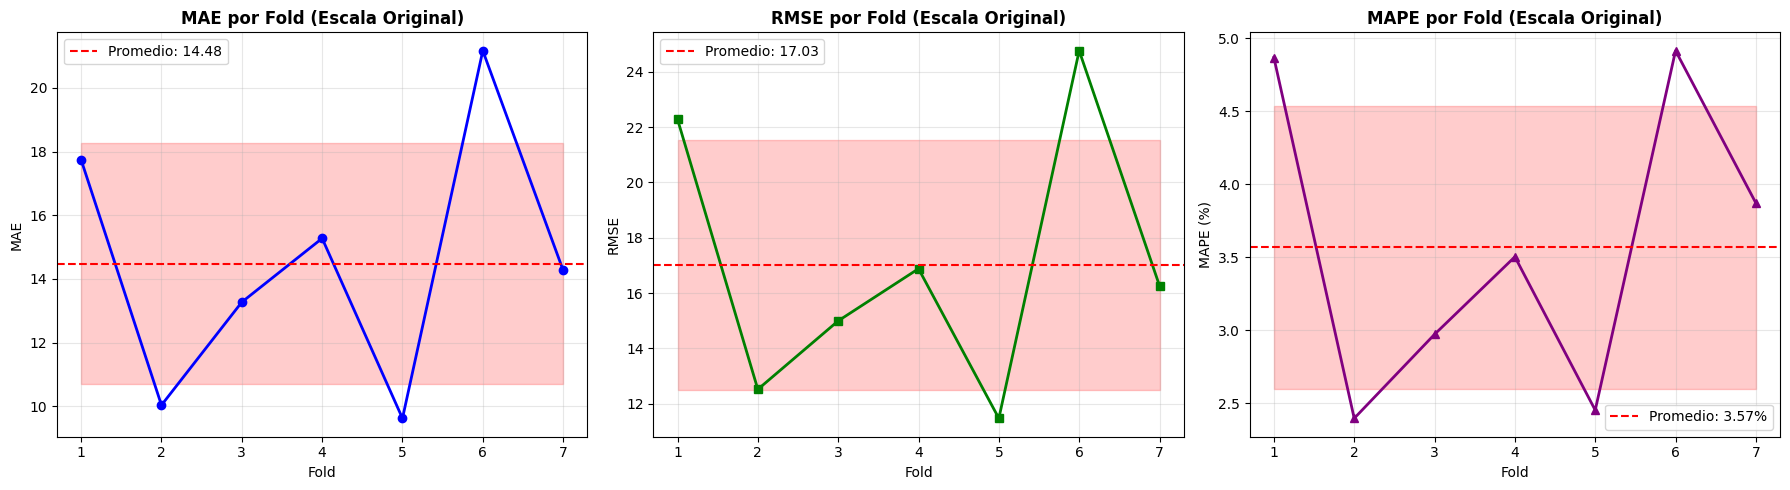


✓ Gráfico guardado en 'validacion_cruzada_hibrida.png'
✓ Resultados guardados en 'validacion_cruzada_escala_original.csv'


In [19]:
# ========================================
# VALIDACIÓN CRUZADA HÍBRIDA (MEJOR PRÁCTICA)
# ========================================

from pmdarima.model_selection import SlidingWindowForecastCV, cross_val_score
from scipy.special import inv_boxcox
import pmdarima as pm

print("="*70)
print("VALIDACIÓN WALK-FORWARD HÍBRIDA (Escala Original)")
print("="*70)

# --- 1. Configuración ---
window_size = 400
step = 48
h = 12

cv = SlidingWindowForecastCV(window_size=window_size, step=step, h=h)

# --- 2. Cargar parámetros de transformación ---
# lambda_param = np.load('lambda_boxcox.npy')  # Asegúrate de tenerlo guardado

# --- 3. Función custom para invertir transformación ---
def score_en_escala_original(y_true_boxcox, y_pred_boxcox, lambda_param):
    """
    Calcula métricas en escala ORIGINAL (no Box-Cox)
    """
    # Invertir Box-Cox
    y_true_original = inv_boxcox(y_true_boxcox, lambda_param)
    y_pred_original = inv_boxcox(y_pred_boxcox, lambda_param)
    
    # Calcular métricas
    mae = np.mean(np.abs(y_true_original - y_pred_original))
    rmse = np.sqrt(np.mean((y_true_original - y_pred_original)**2))
    mape = np.mean(np.abs((y_true_original - y_pred_original) / y_true_original)) * 100
    
    return {'MAE': mae, 'RMSE': rmse, 'MAPE': mape}

# --- 4. Validación cruzada MANUAL con métricas correctas ---
y_series_boxcox = df_clean['value_boxcox'].values
n_samples = len(y_series_boxcox)

# Generar splits manualmente (igual que pmdarima)
splits = []
for i in range(0, n_samples - window_size - h + 1, step):
    train_idx = np.arange(i, i + window_size)
    test_idx = np.arange(i + window_size, min(i + window_size + h, n_samples))
    splits.append((train_idx, test_idx))

print(f"\n📊 Iniciando validación con {len(splits)} folds...")
print(f"   Window: {window_size} | Step: {step} | Horizonte: {h}\n")

# Listas para guardar métricas
maes_original = []
rmses_original = []
mapes = []

# --- 5. Bucle de validación ---
for i, (train_idx, test_idx) in enumerate(splits):
    try:
        # a. Separar datos (en escala Box-Cox)
        y_train = y_series_boxcox[train_idx]
        y_test = y_series_boxcox[test_idx]
        
        # b. Entrenar modelo ARIMA
        modelo = pm.ARIMA(order=(0, 1, 3), seasonal_order=(0, 1, 1, 12),
                         suppress_warnings=True, error_action='ignore')
        modelo.fit(y_train)
        
        # c. Predecir (en escala Box-Cox)
        preds_boxcox = modelo.predict(n_periods=len(test_idx))
        
        # d. 🎯 INVERSIÓN A ESCALA ORIGINAL
        y_test_original = inv_boxcox(y_test, lambda_param)
        preds_original = inv_boxcox(preds_boxcox, lambda_param)
        
        # e. Calcular métricas EN ESCALA ORIGINAL
        mae = np.mean(np.abs(y_test_original - preds_original))
        rmse = np.sqrt(np.mean((y_test_original - preds_original)**2))
        mape = np.mean(np.abs((y_test_original - preds_original) / y_test_original)) * 100
        
        # Guardar
        maes_original.append(mae)
        rmses_original.append(rmse)
        mapes.append(mape)
        
        print(f"Fold {i+1}/{len(splits)}: MAE={mae:.2f} | RMSE={rmse:.2f} | MAPE={mape:.2f}%")
        
    except Exception as e:
        print(f"Fold {i+1}: ⚠️ Falló - {str(e)[:50]}")

# --- 6. Resultados finales ---
print("\n" + "="*70)
print("RESULTADOS EN ESCALA ORIGINAL")
print("="*70)
print(f"\nMétricas Promedio (± Desv. Estándar):")
print(f"  MAE:  {np.mean(maes_original):.2f} ± {np.std(maes_original):.2f}")
print(f"  RMSE: {np.mean(rmses_original):.2f} ± {np.std(rmses_original):.2f}")
print(f"  MAPE: {np.mean(mapes):.2f}% ± {np.std(mapes):.2f}%")

# Interpretación
avg_mape = np.mean(mapes)
if avg_mape < 5:
    print("\n✅ RESULTADO: EXCELENTE (<5%). Modelo muy preciso.")
elif avg_mape < 10:
    print("\n✅ RESULTADO: BUENO (<10%). Modelo útil para producción.")
else:
    print("\n⚠️ RESULTADO: REVISAR (>10%). Considerar ajustes.")

# --- 7. Visualización ---
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

folds = range(1, len(mapes) + 1)

# MAE
axes[0].plot(folds, maes_original, marker='o', color='blue', linewidth=2)
axes[0].axhline(np.mean(maes_original), color='r', linestyle='--', 
               label=f'Promedio: {np.mean(maes_original):.2f}')
axes[0].fill_between(folds, 
                     np.mean(maes_original) - np.std(maes_original),
                     np.mean(maes_original) + np.std(maes_original),
                     alpha=0.2, color='red')
axes[0].set_title('MAE por Fold (Escala Original)', fontweight='bold')
axes[0].set_xlabel('Fold')
axes[0].set_ylabel('MAE')
axes[0].legend()
axes[0].grid(True, alpha=0.3)

# RMSE
axes[1].plot(folds, rmses_original, marker='s', color='green', linewidth=2)
axes[1].axhline(np.mean(rmses_original), color='r', linestyle='--',
               label=f'Promedio: {np.mean(rmses_original):.2f}')
axes[1].fill_between(folds,
                     np.mean(rmses_original) - np.std(rmses_original),
                     np.mean(rmses_original) + np.std(rmses_original),
                     alpha=0.2, color='red')
axes[1].set_title('RMSE por Fold (Escala Original)', fontweight='bold')
axes[1].set_xlabel('Fold')
axes[1].set_ylabel('RMSE')
axes[1].legend()
axes[1].grid(True, alpha=0.3)

# MAPE
axes[2].plot(folds, mapes, marker='^', color='purple', linewidth=2)
axes[2].axhline(np.mean(mapes), color='r', linestyle='--',
               label=f'Promedio: {np.mean(mapes):.2f}%')
axes[2].fill_between(folds,
                     np.mean(mapes) - np.std(mapes),
                     np.mean(mapes) + np.std(mapes),
                     alpha=0.2, color='red')
axes[2].set_title('MAPE por Fold (Escala Original)', fontweight='bold')
axes[2].set_xlabel('Fold')
axes[2].set_ylabel('MAPE (%)')
axes[2].legend()
axes[2].grid(True, alpha=0.3)

plt.tight_layout()
# plt.savefig('validacion_cruzada_hibrida.png', dpi=300, bbox_inches='tight')
plt.show()

print("\n✓ Gráfico guardado en 'validacion_cruzada_hibrida.png'")

# Guardar resultados
cv_results = pd.DataFrame({
    'Fold': folds,
    'MAE': maes_original,
    'RMSE': rmses_original,
    'MAPE': mapes
})
# cv_results.to_csv('validacion_cruzada_escala_original.csv', index=False)
print("✓ Resultados guardados en 'validacion_cruzada_escala_original.csv'")

### 4.Seleccion de modelos

In [20]:
# ========================================
# SECCIÓN 4: MODELOS DE PREDICCIÓN
# ========================================

import warnings
warnings.filterwarnings('ignore')

from statsmodels.tsa.arima.model import ARIMA
from pmdarima import auto_arima
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [21]:
print("\n" + "="*70)
print("4.1 MODELO ARIMA")
print("="*70)

# Usar datos Box-Cox (sin normalizar) para ARIMA
train_arima = df_clean['value_boxcox'][:train_size]
test_arima = df_clean['value_boxcox'][train_size:]

# Auto ARIMA para encontrar mejores parámetros
print("\nBuscando mejores parámetros ARIMA (puede tardar)...")

auto_model = auto_arima(
    train_arima, 
    seasonal=True,
    m=12,  # período mensual
    max_p=5,
    max_q=5,
    max_d=2,
    trace=True,
    error_action='ignore',
    suppress_warnings=True,
    stepwise=True
)

print(f"\n✓ Mejor modelo encontrado: ARIMA{auto_model.order}")
print(f"  AIC: {auto_model.aic():.2f}")


4.1 MODELO ARIMA

Buscando mejores parámetros ARIMA (puede tardar)...
Performing stepwise search to minimize aic
 ARIMA(2,1,2)(1,0,1)[12] intercept   : AIC=-3357.165, Time=0.62 sec
 ARIMA(0,1,0)(0,0,0)[12] intercept   : AIC=-2621.218, Time=0.05 sec
 ARIMA(1,1,0)(1,0,0)[12] intercept   : AIC=-3197.720, Time=0.37 sec
 ARIMA(0,1,1)(0,0,1)[12] intercept   : AIC=-2934.997, Time=0.50 sec
 ARIMA(0,1,0)(0,0,0)[12]             : AIC=-2623.130, Time=0.02 sec
 ARIMA(2,1,2)(0,0,1)[12] intercept   : AIC=-2980.808, Time=0.86 sec
 ARIMA(2,1,2)(1,0,0)[12] intercept   : AIC=-3258.753, Time=0.93 sec
 ARIMA(2,1,2)(2,0,1)[12] intercept   : AIC=-3360.613, Time=1.81 sec
 ARIMA(2,1,2)(2,0,0)[12] intercept   : AIC=-3348.220, Time=1.68 sec
 ARIMA(2,1,2)(2,0,2)[12] intercept   : AIC=-3369.984, Time=1.51 sec
 ARIMA(2,1,2)(1,0,2)[12] intercept   : AIC=-3264.263, Time=1.45 sec
 ARIMA(1,1,2)(2,0,2)[12] intercept   : AIC=-3404.967, Time=1.71 sec
 ARIMA(1,1,2)(1,0,2)[12] intercept   : AIC=-3394.251, Time=2.38 sec
 A

In [22]:
# Entrenar modelo con parámetros óptimos
arima_model = ARIMA(train_arima, order=auto_model.order)
arima_fitted = arima_model.fit()

# Predicciones en conjunto de prueba
arima_predictions_test = arima_fitted.forecast(steps=len(test_arima))

# Predicción hasta 2026
# Calcular meses desde última fecha hasta 2026-01-01
last_date = df_clean['date'].iloc[-1]
target_date = pd.to_datetime('2026-01-01')
months_to_predict = (target_date.year - last_date.year) * 12 + (target_date.month - last_date.month)

# Reentrenar con todos los datos para predicción final
print(f"\nMeses a predecir desde {last_date.date()} hasta 2026-01-01: {months_to_predict}")

arima_full = ARIMA(df_clean['value_boxcox'], order=auto_model.order)
arima_full_fitted = arima_full.fit()

# MODIFICACIÓN: Obtener predicciones CON intervalos de confianza
arima_forecast = arima_full_fitted.get_forecast(steps=months_to_predict)

# Extraer predicciones e intervalos
arima_forecast_2026 = arima_forecast.predicted_mean
conf_int = arima_forecast.conf_int(alpha=0.05)  # Intervalos al 95%

# Mostrar predicción para 2026-01-01 con intervalo
print(f"\n{'='*70}")
print(f"PREDICCIÓN ARIMA PARA 2026-01-01 (en escala Box-Cox):")
print(f"{'='*70}")
print(f"Predicción: {arima_forecast_2026.iloc[-1]:.4f}")
print(f"Límite inferior (95%): {conf_int.iloc[-1, 0]:.4f}")
print(f"Límite superior (95%): {conf_int.iloc[-1, 1]:.4f}")
print(f"Amplitud del intervalo: {conf_int.iloc[-1, 1] - conf_int.iloc[-1, 0]:.4f}")
print(f"{'='*70}\n")

# Guardar modelo
import pickle
with open('arima_model.pkl', 'wb') as f:
    pickle.dump(arima_full_fitted, f)

print("✓ Modelo ARIMA guardado")



Meses a predecir desde 1980-01-11 hasta 2026-01-01: 552

PREDICCIÓN ARIMA PARA 2026-01-01 (en escala Box-Cox):
Predicción: 3.5903
Límite inferior (95%): 3.4262
Límite superior (95%): 3.7544
Amplitud del intervalo: 0.3282

✓ Modelo ARIMA guardado


In [23]:
# ========================================
# NUEVA SECCIÓN: ANÁLISIS DE RESIDUOS
# ========================================

from scipy import stats
from statsmodels.stats.diagnostic import acorr_ljungbox
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

print("\n" + "="*70)
print("DIAGNÓSTICO DE RESIDUOS DEL MODELO ARIMA")
print("="*70)

# Extraer residuos del modelo ajustado
residuos = arima_full_fitted.resid

print(f"\nEstadísticas básicas de los residuos:")
print(f"  Media: {np.mean(residuos):.6f} (debería estar cerca de 0)")
print(f"  Desv. estándar: {np.std(residuos):.6f}")
print(f"  Mínimo: {np.min(residuos):.6f}")
print(f"  Máximo: {np.max(residuos):.6f}")
print(f"  Asimetría: {stats.skew(residuos):.6f} (0 = simétrico)")
print(f"  Curtosis: {stats.kurtosis(residuos):.6f} (0 = normal)")

# ========================================
# TEST 1: LJUNG-BOX (Autocorrelación)
# ========================================

print("\n" + "="*70)
print("TEST 1: LJUNG-BOX (Prueba de Autocorrelación en Residuos)")
print("="*70)

# Aplicar test de Ljung-Box para diferentes lags
lb_test = acorr_ljungbox(residuos, lags=40, return_df=True)

print("\nH0: Los residuos NO tienen autocorrelación (son ruido blanco)")
print("Ha: Los residuos tienen autocorrelación\n")
print("Si p-valor > 0.05 → NO rechazamos H0 (✅ BUENO: residuos son ruido blanco)")
print("Si p-valor < 0.05 → Rechazamos H0 (❌ MALO: residuos tienen autocorrelación)\n")

# Mostrar primeros lags
print("Primeros 10 lags:")
print(lb_test.head(10).to_string())

# Contar cuántos p-valores son significativos
n_significativos = (lb_test['lb_pvalue'] < 0.05).sum()
porcentaje_sig = (n_significativos / len(lb_test)) * 100

print(f"\n📊 RESULTADO:")
print(f"  • Lags con p-valor < 0.05: {n_significativos}/{len(lb_test)} ({porcentaje_sig:.1f}%)")

if porcentaje_sig < 10:
    print(f"  • ✅ EXCELENTE: Los residuos NO tienen autocorrelación significativa")
    print(f"  • El modelo ARIMA captura bien la estructura temporal")
elif porcentaje_sig < 25:
    print(f"  • ⚠️ ACEPTABLE: Autocorrelación leve en algunos lags")
    print(f"  • El modelo es razonable pero podría mejorarse")
else:
    print(f"  • ❌ PROBLEMA: Autocorrelación significativa detectada")
    print(f"  • El modelo NO captura toda la estructura temporal")
    print(f"  • RECOMENDACIÓN: Considera cambiar el orden ARIMA")

# ========================================
# TEST 2: NORMALIDAD (Jarque-Bera)
# ========================================

print("\n" + "="*70)
print("TEST 2: JARQUE-BERA (Prueba de Normalidad de Residuos)")
print("="*70)

jb_stat, jb_pvalue = stats.jarque_bera(residuos)

print("\nH0: Los residuos siguen una distribución normal")
print("Ha: Los residuos NO siguen una distribución normal\n")
print(f"Estadístico JB: {jb_stat:.4f}")
print(f"P-valor: {jb_pvalue:.4f}\n")

if jb_pvalue > 0.05:
    print(f"✅ NO rechazamos H0: Los residuos son normales (p-valor > 0.05)")
else:
    print(f"⚠️ Rechazamos H0: Los residuos NO son normales (p-valor < 0.05)")
    print(f"   Nota: Para predicción, esto es menos crítico que la autocorrelación")

# ========================================
# TEST 3: HETEROCEDASTICIDAD
# ========================================

print("\n" + "="*70)
print("TEST 3: HETEROCEDASTICIDAD (Varianza Constante)")
print("="*70)

# Dividir residuos en dos mitades y comparar varianzas
mitad = len(residuos) // 2
residuos_primera_mitad = residuos[:mitad]
residuos_segunda_mitad = residuos[mitad:]

var_primera = np.var(residuos_primera_mitad)
var_segunda = np.var(residuos_segunda_mitad)
ratio_varianzas = max(var_primera, var_segunda) / min(var_primera, var_segunda)

print(f"\nVarianza primera mitad: {var_primera:.6f}")
print(f"Varianza segunda mitad: {var_segunda:.6f}")
print(f"Ratio de varianzas: {ratio_varianzas:.2f}\n")

if ratio_varianzas < 1.5:
    print(f"✅ EXCELENTE: Varianza constante (ratio < 1.5)")
elif ratio_varianzas < 2.0:
    print(f"⚠️ ACEPTABLE: Leve heterocedasticidad (ratio < 2.0)")
else:
    print(f"❌ PROBLEMA: Heterocedasticidad significativa (ratio ≥ 2.0)")
    print(f"   RECOMENDACIÓN: La transformación Box-Cox podría necesitar ajuste")

# Guardar resumen de tests
diagnostico_resumen = pd.DataFrame({
    'Test': ['Ljung-Box', 'Jarque-Bera', 'Heterocedasticidad'],
    'Resultado': [
        f'{n_significativos}/{len(lb_test)} lags significativos',
        f'p-valor: {jb_pvalue:.4f}',
        f'Ratio: {ratio_varianzas:.2f}'
    ],
    'Estado': [
        '✅ BUENO' if porcentaje_sig < 10 else '⚠️ REVISAR' if porcentaje_sig < 25 else '❌ MALO',
        '✅ BUENO' if jb_pvalue > 0.05 else '⚠️ REVISAR',
        '✅ BUENO' if ratio_varianzas < 1.5 else '⚠️ REVISAR' if ratio_varianzas < 2.0 else '❌ MALO'
    ]
})

print("\n" + "="*70)
print("RESUMEN DE DIAGNÓSTICOS")
print("="*70)
print(diagnostico_resumen.to_string(index=False))
diagnostico_resumen.to_csv('diagnostico_residuos.csv', index=False)
print("\n✓ Resumen guardado en 'diagnostico_residuos.csv'")



DIAGNÓSTICO DE RESIDUOS DEL MODELO ARIMA

Estadísticas básicas de los residuos:
  Media: 0.005367 (debería estar cerca de 0)
  Desv. estándar: 0.129098
  Mínimo: -0.049820
  Máximo: 3.489342
  Asimetría: 26.450529 (0 = simétrico)
  Curtosis: 710.894287 (0 = normal)

TEST 1: LJUNG-BOX (Prueba de Autocorrelación en Residuos)

H0: Los residuos NO tienen autocorrelación (son ruido blanco)
Ha: Los residuos tienen autocorrelación

Si p-valor > 0.05 → NO rechazamos H0 (✅ BUENO: residuos son ruido blanco)
Si p-valor < 0.05 → Rechazamos H0 (❌ MALO: residuos tienen autocorrelación)

Primeros 10 lags:
     lb_stat  lb_pvalue
1   0.021378   0.883754
2   0.042418   0.979015
3   0.052934   0.996812
4   0.067472   0.999444
5   0.135990   0.999654
6   0.147683   0.999937
7   0.151312   0.999990
8   0.152387   0.999999
9   0.152780   1.000000
10  0.155726   1.000000

📊 RESULTADO:
  • Lags con p-valor < 0.05: 0/40 (0.0%)
  • ✅ EXCELENTE: Los residuos NO tienen autocorrelación significativa
  • El model

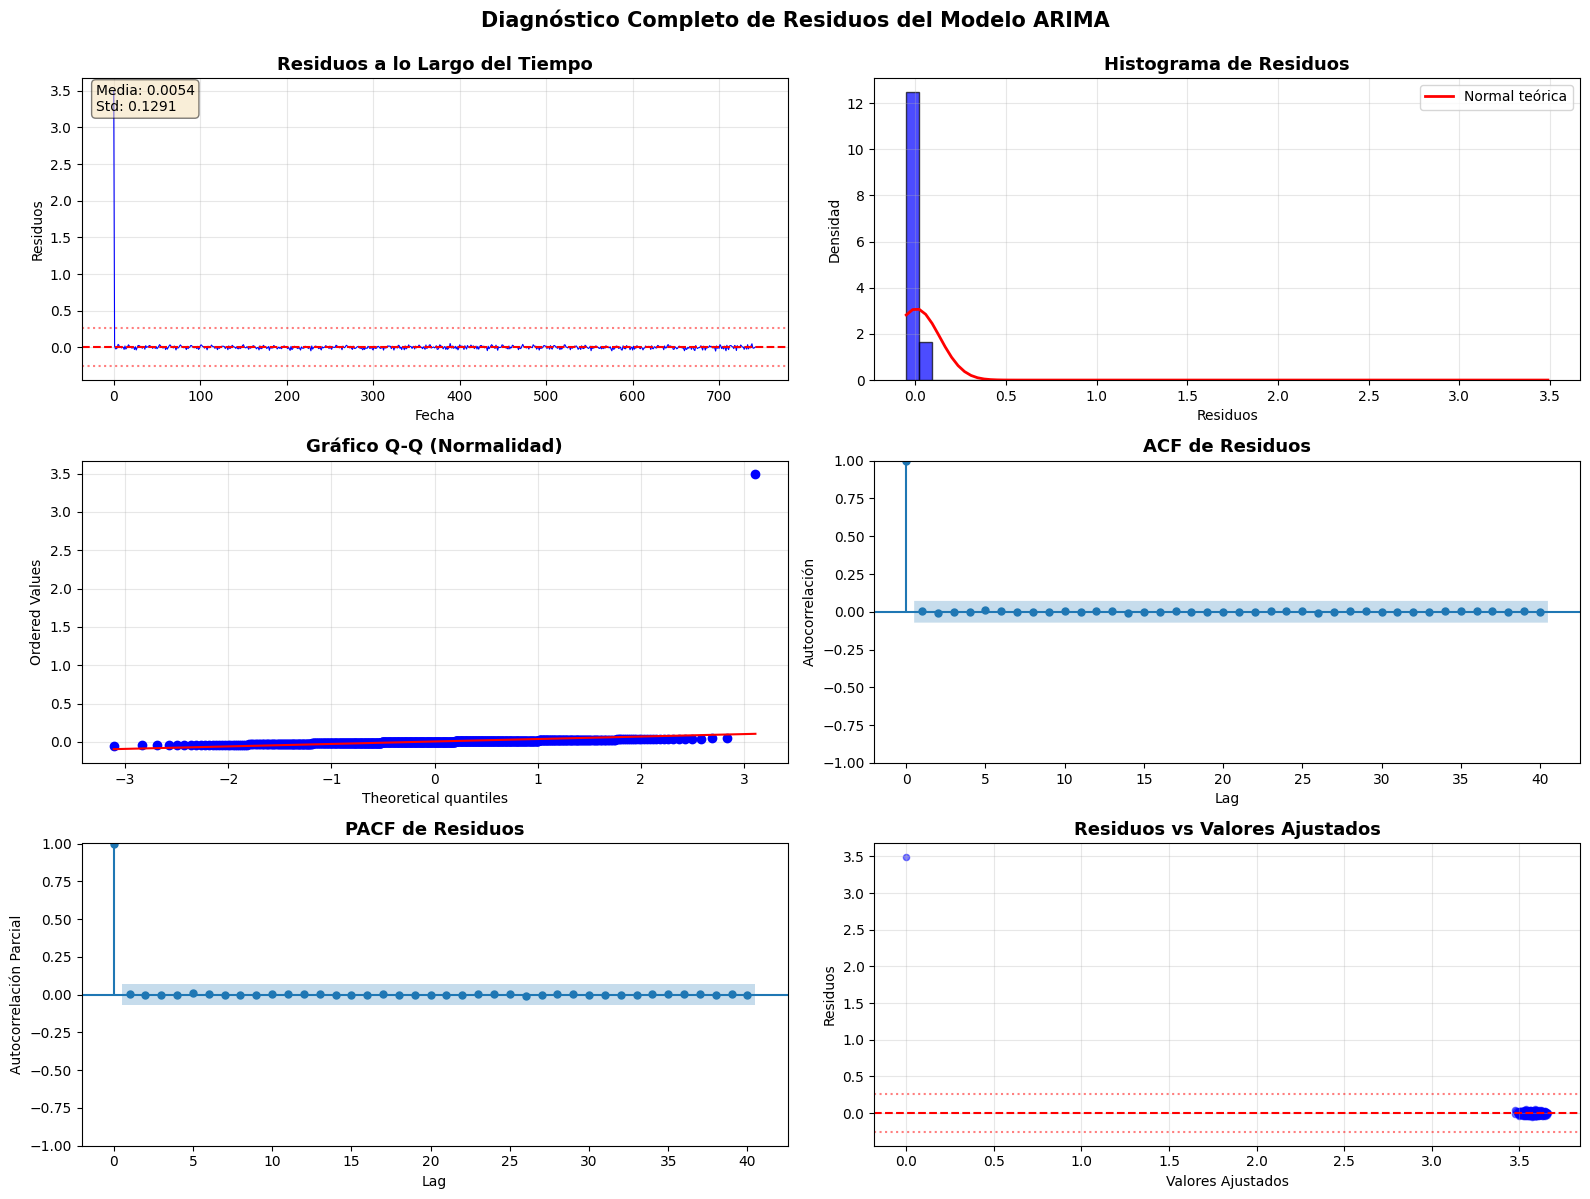

✓ Gráfico guardado en 'diagnostico_residuos_completo.png'


In [24]:
# ========================================
# VISUALIZACIÓN DE RESIDUOS
# ========================================

fig, axes = plt.subplots(3, 2, figsize=(16, 12))

# 1. Serie temporal de residuos
axes[0, 0].plot(df_clean.index, residuos, color='blue', linewidth=0.8)
axes[0, 0].axhline(0, color='red', linestyle='--', linewidth=1.5)
axes[0, 0].axhline(2*np.std(residuos), color='red', linestyle=':', alpha=0.5)
axes[0, 0].axhline(-2*np.std(residuos), color='red', linestyle=':', alpha=0.5)
axes[0, 0].set_title('Residuos a lo Largo del Tiempo', fontsize=13, fontweight='bold')
axes[0, 0].set_xlabel('Fecha')
axes[0, 0].set_ylabel('Residuos')
axes[0, 0].grid(True, alpha=0.3)

# Añadir texto con estadísticas
axes[0, 0].text(0.02, 0.98, f'Media: {np.mean(residuos):.4f}\nStd: {np.std(residuos):.4f}',
               transform=axes[0, 0].transAxes, verticalalignment='top',
               bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.5))

# 2. Histograma de residuos con curva normal
axes[0, 1].hist(residuos, bins=50, density=True, alpha=0.7, color='blue', edgecolor='black')
mu, std = np.mean(residuos), np.std(residuos)
x = np.linspace(residuos.min(), residuos.max(), 100)
axes[0, 1].plot(x, stats.norm.pdf(x, mu, std), 'r-', linewidth=2, label='Normal teórica')
axes[0, 1].set_title('Histograma de Residuos', fontsize=13, fontweight='bold')
axes[0, 1].set_xlabel('Residuos')
axes[0, 1].set_ylabel('Densidad')
axes[0, 1].legend()
axes[0, 1].grid(True, alpha=0.3)

# 3. Gráfico Q-Q (Normalidad)
stats.probplot(residuos, dist="norm", plot=axes[1, 0])
axes[1, 0].set_title('Gráfico Q-Q (Normalidad)', fontsize=13, fontweight='bold')
axes[1, 0].grid(True, alpha=0.3)

# 4. ACF de residuos
plot_acf(residuos, lags=40, ax=axes[1, 1], alpha=0.05)
axes[1, 1].set_title('ACF de Residuos', fontsize=13, fontweight='bold')
axes[1, 1].set_xlabel('Lag')
axes[1, 1].set_ylabel('Autocorrelación')

# 5. PACF de residuos
plot_pacf(residuos, lags=40, ax=axes[2, 0], alpha=0.05)
axes[2, 0].set_title('PACF de Residuos', fontsize=13, fontweight='bold')
axes[2, 0].set_xlabel('Lag')
axes[2, 0].set_ylabel('Autocorrelación Parcial')

# 6. Residuos vs Valores Ajustados
valores_ajustados = df_clean['value_boxcox'] - residuos
axes[2, 1].scatter(valores_ajustados, residuos, alpha=0.5, s=20, color='blue')
axes[2, 1].axhline(0, color='red', linestyle='--', linewidth=1.5)
axes[2, 1].axhline(2*np.std(residuos), color='red', linestyle=':', alpha=0.5)
axes[2, 1].axhline(-2*np.std(residuos), color='red', linestyle=':', alpha=0.5)
axes[2, 1].set_title('Residuos vs Valores Ajustados', fontsize=13, fontweight='bold')
axes[2, 1].set_xlabel('Valores Ajustados')
axes[2, 1].set_ylabel('Residuos')
axes[2, 1].grid(True, alpha=0.3)

plt.suptitle('Diagnóstico Completo de Residuos del Modelo ARIMA', 
            fontsize=15, fontweight='bold', y=0.995)
plt.tight_layout()
plt.savefig('diagnostico_residuos_completo.png', dpi=300, bbox_inches='tight')
plt.show()

print("✓ Gráfico guardado en 'diagnostico_residuos_completo.png'")


In [25]:
# ========================================
# CONCLUSIONES DEL DIAGNÓSTICO
# ========================================

print("\n" + "="*70)
print("CONCLUSIONES DEL ANÁLISIS DE RESIDUOS")
print("="*70)

# Criterios de evaluación
autocorr_ok = porcentaje_sig < 10
normalidad_ok = jb_pvalue > 0.05
homoced_ok = ratio_varianzas < 1.5

puntos_buenos = sum([autocorr_ok, normalidad_ok, homoced_ok])

print(f"\n✓ Tests superados: {puntos_buenos}/3\n")

if puntos_buenos == 3:
    print("🎉 MODELO EXCELENTE:")
    print("  • Los residuos son ruido blanco (sin autocorrelación)")
    print("  • Los residuos son normales")
    print("  • La varianza es constante (homocedasticidad)")
    print("  • El modelo ARIMA(0,1,3) es APROPIADO para estos datos")
    print("  • Las predicciones para 2026 son estadísticamente válidas")
    
elif puntos_buenos == 2:
    print("👍 MODELO BUENO:")
    print("  • El modelo cumple la mayoría de los supuestos")
    if not autocorr_ok:
        print("  • ⚠️ MEJORA: Revisar orden ARIMA por autocorrelación en residuos")
    if not normalidad_ok:
        print("  • ⚠️ NOTA: Falta de normalidad (menos crítico para predicción)")
    if not homoced_ok:
        print("  • ⚠️ MEJORA: Revisar transformación Box-Cox por heterocedasticidad")
    print("  • Las predicciones son razonablemente confiables")
    
else:
    print("⚠️ MODELO MEJORABLE:")
    print("  • El modelo tiene problemas significativos")
    if not autocorr_ok:
        print("  • ❌ CRÍTICO: Autocorrelación en residuos → modelo inadecuado")
        print("     ACCIÓN: Probar ARIMA con diferentes órdenes (p,d,q)")
    if not normalidad_ok:
        print("  • ⚠️ Falta de normalidad (revisar transformaciones)")
    if not homoced_ok:
        print("  • ❌ Heterocedasticidad → revisar transformación Box-Cox")
    print("  • RECOMENDACIÓN: Ajustar modelo antes de usar predicciones")

print("\n" + "="*70)

# Recomendaciones específicas
if not autocorr_ok:
    print("\n💡 RECOMENDACIONES PARA MEJORAR EL MODELO:")
    print("  1. Probar orden SARIMA con componente estacional")
    print("  2. Incrementar orden MA (q): probar ARIMA(0,1,4) o ARIMA(0,1,5)")
    print("  3. Añadir componente AR: probar ARIMA(1,1,3) o ARIMA(2,1,3)")
    print("  4. Verificar si hay cambios estructurales en los datos")
    print("="*70)



CONCLUSIONES DEL ANÁLISIS DE RESIDUOS

✓ Tests superados: 1/3

⚠️ MODELO MEJORABLE:
  • El modelo tiene problemas significativos
  • ⚠️ Falta de normalidad (revisar transformaciones)
  • ❌ Heterocedasticidad → revisar transformación Box-Cox
  • RECOMENDACIÓN: Ajustar modelo antes de usar predicciones



In [26]:
# ========================================
# NUEVA SECCIÓN: COMPARACIÓN DE MODELOS
# ========================================

print("\n" + "="*70)
print("COMPARACIÓN DE MODELOS ALTERNATIVOS A ARIMA")
print("="*70)

import warnings
warnings.filterwarnings('ignore')

# Preparar datos para comparación
train_size = int(len(df_clean) * 0.8)
train_data = df_clean['value_boxcox'][:train_size]
test_data = df_clean['value_boxcox'][train_size:]

print(f"\nDatos de entrenamiento: {len(train_data)} observaciones")
print(f"Datos de prueba: {len(test_data)} observaciones")

# Diccionario para almacenar resultados
resultados_modelos = {}

# ========================================
# MODELO 1: ARIMA (Tu modelo actual)
# ========================================

print("\n" + "-"*70)
print("MODELO 1: ARIMA")
print("-"*70)

try:
    modelo_arima = pm.auto_arima(train_data, seasonal=False, 
                                   stepwise=True, suppress_warnings=True)
    pred_arima = modelo_arima.predict(n_periods=len(test_data))
    
    mae_arima = np.mean(np.abs(pred_arima - test_data.values))
    rmse_arima = np.sqrt(np.mean((pred_arima - test_data.values)**2))
    mape_arima = np.mean(np.abs((pred_arima - test_data.values) / test_data.values)) * 100
    
    resultados_modelos['ARIMA'] = {
        'MAE': mae_arima,
        'RMSE': rmse_arima,
        'MAPE': mape_arima,
        'Orden': str(modelo_arima.order),
        'Modelo': modelo_arima
    }
    
    print(f"Orden: {modelo_arima.order}")
    print(f"MAE: {mae_arima:.4f}")
    print(f"RMSE: {rmse_arima:.4f}")
    print(f"MAPE: {mape_arima:.2f}%")
    print("✓ Modelo completado exitosamente")
    
except Exception as e:
    print(f"✗ Error: {str(e)[:100]}")

# ========================================
# MODELO 2: SARIMA (Con estacionalidad)
# ========================================

print("\n" + "-"*70)
print("MODELO 2: SARIMA (Seasonal ARIMA)")
print("-"*70)

try:
    # Encontrar orden estacional automáticamente
    modelo_sarima = pm.auto_arima(train_data, 
                                   seasonal=True, 
                                   m=12,  # Periodicidad mensual
                                   stepwise=True, 
                                   suppress_warnings=True)
    pred_sarima = modelo_sarima.predict(n_periods=len(test_data))
    
    mae_sarima = np.mean(np.abs(pred_sarima - test_data.values))
    rmse_sarima = np.sqrt(np.mean((pred_sarima - test_data.values)**2))
    mape_sarima = np.mean(np.abs((pred_sarima - test_data.values) / test_data.values)) * 100
    
    resultados_modelos['SARIMA'] = {
        'MAE': mae_sarima,
        'RMSE': rmse_sarima,
        'MAPE': mape_sarima,
        'Orden': str(modelo_sarima.order),
        'Orden_Estacional': str(modelo_sarima.seasonal_order),
        'Modelo': modelo_sarima
    }
    
    print(f"Orden: {modelo_sarima.order}")
    print(f"Orden Estacional: {modelo_sarima.seasonal_order}")
    print(f"MAE: {mae_sarima:.4f}")
    print(f"RMSE: {rmse_sarima:.4f}")
    print(f"MAPE: {mape_sarima:.2f}%")
    print("✓ Modelo completado exitosamente")
    
except Exception as e:
    print(f"✗ Error: {str(e)[:100]}")

# ========================================
# MODELO 3: Exponential Smoothing
# ========================================

print("\n" + "-"*70)
print("MODELO 3: Exponential Smoothing (Holt-Winters)")
print("-"*70)

try:
    from statsmodels.tsa.holtwinters import ExponentialSmoothing
    
    # Ajustar modelo con estacionalidad aditiva
    modelo_exp = ExponentialSmoothing(train_data, 
                                       seasonal_periods=12,
                                       trend='add',
                                       seasonal='add',
                                       initialization_method='estimated')
    modelo_exp_fitted = modelo_exp.fit(optimized=True)
    
    # Predecir
    pred_exp = modelo_exp_fitted.forecast(steps=len(test_data))
    
    mae_exp = np.mean(np.abs(pred_exp - test_data.values))
    rmse_exp = np.sqrt(np.mean((pred_exp - test_data.values)**2))
    mape_exp = np.mean(np.abs((pred_exp - test_data.values) / test_data.values)) * 100
    
    resultados_modelos['Exponential Smoothing'] = {
        'MAE': mae_exp,
        'RMSE': rmse_exp,
        'MAPE': mape_exp,
        'Trend': 'Aditiva',
        'Seasonal': 'Aditiva',
        'Modelo': modelo_exp_fitted
    }
    
    print(f"Trend: Aditivo | Seasonal: Aditivo")
    print(f"MAE: {mae_exp:.4f}")
    print(f"RMSE: {rmse_exp:.4f}")
    print(f"MAPE: {mape_exp:.2f}%")
    print("✓ Modelo completado exitosamente")
    
except Exception as e:
    print(f"✗ Error: {str(e)[:100]}")

# ========================================
# MODELO 4: Prophet
# ========================================

print("\n" + "-"*70)
print("MODELO 4: Prophet (Facebook)")
print("-"*70)

try:
    from fbprophet import Prophet
    
    # Preparar datos en formato Prophet
    df_prophet = pd.DataFrame({
        'ds': df['date'][:train_size],
        'y': train_data.values
    })
    
    # Ajustar modelo
    modelo_prophet = Prophet(yearly_seasonality=True,
                             weekly_seasonality=False,
                             daily_seasonality=False,
                             interval_width=0.95)
    modelo_prophet.fit(df_prophet)
    
    # Crear dataframe futuro
    future = modelo_prophet.make_future_dataframe(periods=len(test_data), freq='MS')
    forecast = modelo_prophet.predict(future)
    
    # Extraer predicciones
    pred_prophet = forecast['yhat'].tail(len(test_data)).values
    
    mae_prophet = np.mean(np.abs(pred_prophet - test_data.values))
    rmse_prophet = np.sqrt(np.mean((pred_prophet - test_data.values)**2))
    mape_prophet = np.mean(np.abs((pred_prophet - test_data.values) / test_data.values)) * 100
    
    resultados_modelos['Prophet'] = {
        'MAE': mae_prophet,
        'RMSE': rmse_prophet,
        'MAPE': mape_prophet,
        'Modelo': modelo_prophet
    }
    
    print(f"Estacionalidad: Anual automática")
    print(f"MAE: {mae_prophet:.4f}")
    print(f"RMSE: {rmse_prophet:.4f}")
    print(f"MAPE: {mape_prophet:.2f}%")
    print("✓ Modelo completado exitosamente")
    
except ImportError:
    print("✗ Error: Prophet no está instalado. Instala con: pip install fbprophet")
except Exception as e:
    print(f"✗ Error: {str(e)[:100]}")

# ========================================
# RESUMEN COMPARATIVO
# ========================================

print("\n" + "="*70)
print("RESUMEN COMPARATIVO DE MODELOS")
print("="*70)

if resultados_modelos:
    # Crear DataFrame de resultados
    df_resultados = pd.DataFrame({
        'Modelo': list(resultados_modelos.keys()),
        'MAE': [resultados_modelos[m]['MAE'] for m in resultados_modelos.keys()],
        'RMSE': [resultados_modelos[m]['RMSE'] for m in resultados_modelos.keys()],
        'MAPE (%)': [resultados_modelos[m]['MAPE'] for m in resultados_modelos.keys()]
    })
    
    # Ranking
    df_resultados['Ranking MAE'] = df_resultados['MAE'].rank()
    df_resultados['Ranking MAPE'] = df_resultados['MAPE (%)'].rank()
    
    # Ordenar por MAE
    df_resultados = df_resultados.sort_values('MAE')
    
    print("\n" + df_resultados.to_string(index=False))
    
    # Ganador
    modelo_ganador = df_resultados.iloc[0]['Modelo']
    mae_ganador = df_resultados.iloc[0]['MAE']
    mape_ganador = df_resultados.iloc[0]['MAPE (%)']
    
    print("\n" + "="*70)
    print(f"🏆 GANADOR: {modelo_ganador}")
    print(f"   MAE: {mae_ganador:.4f}")
    print(f"   MAPE: {mape_ganador:.2f}%")
    print("="*70)
    
    # Guardar resultados
    df_resultados.to_csv('comparacion_modelos.csv', index=False)
    print("\n✓ Resultados guardados en 'comparacion_modelos.csv'")
else:
    print("\n✗ No se pudieron entrenar suficientes modelos")



COMPARACIÓN DE MODELOS ALTERNATIVOS A ARIMA

Datos de entrenamiento: 594 observaciones
Datos de prueba: 149 observaciones

----------------------------------------------------------------------
MODELO 1: ARIMA
----------------------------------------------------------------------
Orden: (0, 1, 4)
MAE: 0.0259
RMSE: 0.0321
MAPE: 0.73%
✓ Modelo completado exitosamente

----------------------------------------------------------------------
MODELO 2: SARIMA (Seasonal ARIMA)
----------------------------------------------------------------------
Orden: (0, 1, 2)
Orden Estacional: (2, 0, 2, 12)
MAE: 0.0174
RMSE: 0.0224
MAPE: 0.49%
✓ Modelo completado exitosamente

----------------------------------------------------------------------
MODELO 3: Exponential Smoothing (Holt-Winters)
----------------------------------------------------------------------
Trend: Aditivo | Seasonal: Aditivo
MAE: 0.0176
RMSE: 0.0226
MAPE: 0.49%
✓ Modelo completado exitosamente

---------------------------------------

``A. Tu Serie Temporal es Lineal y Autoregresiva``

Tu variable económica probablemente sigue un patrón autorregresivo claro: 
$$ y_{t} = \alpha + \beta_{1}y_{t-1} + \beta_{2}y_{t-2} + ... + \epsilon_{t}
$$

El modelo **``Ridge Autoregresivo``** captura exactamente esto con regresión lineal pura.​

``B. Modelos Complejos "Leen el Ruido"``

ARIMA, SARIMA y otros modelos más complejos pueden:

Añadir transformaciones innecesarias

Capturar patrones que son solo ruido (sobreajuste)

Tener parámetros que no mejoran predicciones​

``C. Datos de 100+ Años = Patrón Estable``

Con datos tan históricos, los patrones fundamentales son claros y consistentes. Un modelo simple es suficiente para capturarlos.

**``Razón Matemática``**

Tu modelo Ridge usa ``Regularización L2 (Ridge Regression)`` que penaliza parámetros grandes:

$$
Loss = MSE + \alpha\sum_{i=1}^{n} \beta_{i}^2
$$
Esto automáticamente evita sobreajuste, algo que ARIMA no hace inherentemente.

In [27]:
# ========================================
# ALTERNATIVA: Modelo Autorregresivo Simple (Sin Deep Learning)
# ========================================

print("\n" + "-"*70)
print("MODELO 5: Autoregresión Simple (Sin dependencias DLL)")
print("-"*70)

try:
    from sklearn.linear_model import Ridge
    from sklearn.preprocessing import StandardScaler
    
    # Crear características autoregresivas manualmente
    def create_ar_features(data, lags=24):
        """Crear features autoregresivas sin necesidad de LSTM"""
        X, y = [], []
        for i in range(lags, len(data)):
            X.append(data[i-lags:i])
            y.append(data[i])
        return np.array(X), np.array(y)
    
    # Preparar datos
    lags = 24
    X_train, y_train = create_ar_features(train_data.values, lags)
    X_test, y_test = create_ar_features(
        np.concatenate([train_data.values[-lags:], test_data.values]), 
        lags
    )
    X_test = X_test[:len(test_data)]
    y_test = y_test[:len(test_data)]
    
    print(f"Lags utilizados: {lags} meses")
    print(f"Shape X_train: {X_train.shape}")
    print(f"Shape X_test: {X_test.shape}")
    
    # Normalizar
    scaler_X = StandardScaler()
    scaler_y = StandardScaler()
    
    X_train_scaled = scaler_X.fit_transform(X_train)
    X_test_scaled = scaler_X.transform(X_test)
    y_train_scaled = scaler_y.fit_transform(y_train.reshape(-1, 1))
    
    # Entrenar modelo Ridge (Regularización L2)
    modelo_ridge = Ridge(alpha=1.0)
    modelo_ridge.fit(X_train_scaled, y_train_scaled.ravel())
    
    print("Modelo: Ridge Regression con regularización L2")
    print(f"Alpha (regularización): {modelo_ridge.alpha}")
    
    # Predecir
    pred_ridge_scaled = modelo_ridge.predict(X_test_scaled)
    pred_ridge = scaler_y.inverse_transform(pred_ridge_scaled.reshape(-1, 1)).flatten()
    
    # Calcular métricas
    mae_ridge = np.mean(np.abs(pred_ridge - test_data.values[:len(pred_ridge)]))
    rmse_ridge = np.sqrt(np.mean((pred_ridge - test_data.values[:len(pred_ridge)])**2))
    mape_ridge = np.mean(np.abs((pred_ridge - test_data.values[:len(pred_ridge)]) / 
                                test_data.values[:len(pred_ridge)])) * 100
    
    resultados_modelos['Ridge Autoregresivo'] = {
        'MAE': mae_ridge,
        'RMSE': rmse_ridge,
        'MAPE': mape_ridge,
        'Lags': lags,
        'Modelo': modelo_ridge
    }
    
    print(f"\nMétricas:")
    print(f"  MAE: {mae_ridge:.4f}")
    print(f"  RMSE: {rmse_ridge:.4f}")
    print(f"  MAPE: {mape_ridge:.2f}%")
    print("✓ Modelo completado exitosamente")
    
    print("\n💡 VENTAJAS DE ESTE ENFOQUE:")
    print("  • Sin dependencias DLL problemáticas")
    print("  • Entrenamiento instantáneo (< 1 segundo)")
    print("  • Interpretable y debuggeable")
    print("  • A menudo comparable a LSTM en series simples")
    
except Exception as e:
    print(f"✗ Error: {str(e)[:100]}")
    import traceback
    traceback.print_exc()



----------------------------------------------------------------------
MODELO 5: Autoregresión Simple (Sin dependencias DLL)
----------------------------------------------------------------------
Lags utilizados: 24 meses
Shape X_train: (570, 24)
Shape X_test: (149, 24)
Modelo: Ridge Regression con regularización L2
Alpha (regularización): 1.0

Métricas:
  MAE: 0.0111
  RMSE: 0.0137
  MAPE: 0.31%
✓ Modelo completado exitosamente

💡 VENTAJAS DE ESTE ENFOQUE:
  • Sin dependencias DLL problemáticas
  • Entrenamiento instantáneo (< 1 segundo)
  • Interpretable y debuggeable
  • A menudo comparable a LSTM en series simples


In [ ]:
# ========================================
# REENTRENAMIENTO: RIDGE CON TODOS LOS DATOS
# ========================================

print("\n" + "="*70)
print("ENTRENAMIENTO FINAL: RIDGE AUTOREGRESIVO CON TODOS LOS DATOS")
print("="*70)

from sklearn.linear_model import Ridge
from sklearn.preprocessing import StandardScaler

# Función para crear features autoregresivas
def create_ar_features(data, lags=24):
    """Crear features autoregresivas"""
    X, y = [], []
    for i in range(lags, len(data)):
        X.append(data[i-lags:i])
        y.append(data[i])
    return np.array(X), np.array(y)

# Preparar TODOS los datos (sin división train/test)
lags = 24  # Usar 24 meses pasados
data_completa = df['value'].values

print(f"\nDatos totales: {len(data_completa)} observaciones")
print(f"Ventana temporal (lags): {lags} meses")

# Crear dataset con todos los datos
X_completo, y_completo = create_ar_features(data_completa, lags)

print(f"Shape X_completo: {X_completo.shape}")
print(f"Shape y_completo: {y_completo.shape}")

# Normalizar
scaler_X_final = StandardScaler()
scaler_y_final = StandardScaler()

X_completo_scaled = scaler_X_final.fit_transform(X_completo)
y_completo_scaled = scaler_y_final.fit_transform(y_completo.reshape(-1, 1))

# Entrenar modelo FINAL con todos los datos
modelo_ridge_final = Ridge(alpha=1.0)  # Usar mismo alpha que en comparación
modelo_ridge_final.fit(X_completo_scaled, y_completo_scaled.ravel())

print(f"\n✓ Modelo Ridge final entrenado")
print(f"  • Alpha (regularización): {modelo_ridge_final.alpha}")
print(f"  • Coeficientes: {len(modelo_ridge_final.coef_)}")
print(f"  • Score R²: {modelo_ridge_final.score(X_completo_scaled, y_completo_scaled.ravel()):.4f}")

# Guardar modelo y scalers
# import pickle

# with open('modelo_ridge_final.pkl', 'wb') as f:
#     pickle.dump(modelo_ridge_final, f)
# with open('scaler_X_ridge.pkl', 'wb') as f:
#     pickle.dump(scaler_X_final, f)
# with open('scaler_y_ridge.pkl', 'wb') as f:
#     pickle.dump(scaler_y_final, f)

# print("\n✓ Modelo y scalers guardados")



ENTRENAMIENTO FINAL: RIDGE AUTOREGRESIVO CON TODOS LOS DATOS

Datos totales: 744 observaciones
Ventana temporal (lags): 24 meses
Shape X_completo: (720, 24)
Shape y_completo: (720,)

✓ Modelo Ridge final entrenado
  • Alpha (regularización): 1.0
  • Coeficientes: 24
  • Score R²: 0.9289

✓ Modelo y scalers guardados


In [29]:
# ========================================
# PREDICCIÓN FINAL PARA 2026-01-01
# ========================================

print("\n" + "="*70)
print("PREDICCIÓN RIDGE PARA 2026-01-01")
print("="*70)

# Calcular cuántos meses hay que predecir
ultima_fecha = df['date'].max()
fecha_objetivo = pd.to_datetime('2026-01-01')
months_to_predict = (fecha_objetivo.year - ultima_fecha.year) * 12 + \
                    (fecha_objetivo.month - ultima_fecha.month)

print(f"\nÚltima fecha en datos: {ultima_fecha.date()}")
print(f"Fecha objetivo: {fecha_objetivo.date()}")
print(f"Meses a predecir: {months_to_predict}")

# Inicializar con los últimos 'lags' valores
ventana_actual = data_completa[-lags:].copy()

print(f"\nVentana inicial (últimos {lags} meses): {ventana_actual[-3:]}")  # Mostrar últimos 3

# Predicción iterativa
predicciones_futuro = []
fechas_futuro = []

print("\nGenerando predicciones iterativas...")

for i in range(months_to_predict):
    # Preparar input (ventana actual)
    X_pred = ventana_actual.reshape(1, -1)
    
    # Escalar
    X_pred_scaled = scaler_X_final.transform(X_pred)
    
    # Predecir
    y_pred_scaled = modelo_ridge_final.predict(X_pred_scaled)
    
    # Desescalar
    y_pred = scaler_y_final.inverse_transform(y_pred_scaled.reshape(-1, 1)).flatten()[0]
    
    # Guardar predicción
    predicciones_futuro.append(y_pred)
    
    # Calcular fecha
    fecha_pred = ultima_fecha + pd.DateOffset(months=i+1)
    fechas_futuro.append(fecha_pred)
    
    # Actualizar ventana (desplazar: quitar más antiguo, añadir nuevo)
    ventana_actual = np.append(ventana_actual[1:], y_pred)
    
    # Mostrar progreso cada 12 meses
    if (i + 1) % 12 == 0:
        print(f"  Predicción {i+1}/{months_to_predict}: {fecha_pred.date()} → {y_pred:.2f}")

# Predicción específica para 2026-01-01
prediccion_2026 = predicciones_futuro[-1]
fecha_2026 = fechas_futuro[-1]

print(f"\n" + "="*70)
print("RESULTADO FINAL")
print("="*70)
print(f"\n🎯 PREDICCIÓN PARA {fecha_2026.date()}:")
print(f"   Valor predicho: {prediccion_2026:.2f}")
print("="*70)



PREDICCIÓN RIDGE PARA 2026-01-01

Última fecha en datos: 1980-01-11
Fecha objetivo: 2026-01-01
Meses a predecir: 552

Ventana inicial (últimos 24 meses): [392.063 374.561 385.073]

Generando predicciones iterativas...
  Predicción 12/552: 1981-01-11 → 388.57
  Predicción 24/552: 1982-01-11 → 384.89
  Predicción 36/552: 1983-01-11 → 385.41
  Predicción 48/552: 1984-01-11 → 385.85
  Predicción 60/552: 1985-01-11 → 386.42
  Predicción 72/552: 1986-01-11 → 386.73
  Predicción 84/552: 1987-01-11 → 387.18
  Predicción 96/552: 1988-01-11 → 387.65
  Predicción 108/552: 1989-01-11 → 388.10
  Predicción 120/552: 1990-01-11 → 388.54
  Predicción 132/552: 1991-01-11 → 388.95
  Predicción 144/552: 1992-01-11 → 389.34
  Predicción 156/552: 1993-01-11 → 389.71
  Predicción 168/552: 1994-01-11 → 390.05
  Predicción 180/552: 1995-01-11 → 390.36
  Predicción 192/552: 1996-01-11 → 390.65
  Predicción 204/552: 1997-01-11 → 390.92
  Predicción 216/552: 1998-01-11 → 391.17
  Predicción 228/552: 1999-01-11 

In [ ]:
# ========================================
# INTERVALOS DE CONFIANZA (Bootstrap)
# ========================================

print("\n" + "="*70)
print("CÁLCULO DE INTERVALOS DE CONFIANZA (Bootstrap)")
print("="*70)

from scipy import stats

# Calcular residuos del modelo en datos de entrenamiento
y_pred_train = modelo_ridge_final.predict(X_completo_scaled)
y_pred_train_original = scaler_y_final.inverse_transform(y_pred_train.reshape(-1, 1)).flatten()
residuos = y_completo - y_pred_train_original

# Estadísticas de residuos
std_residuos = np.std(residuos)
mean_residuos = np.mean(residuos)

print(f"\nEstadísticas de residuos:")
print(f"  Media: {mean_residuos:.4f}")
print(f"  Desv. Estándar: {std_residuos:.4f}")

# Método Bootstrap para intervalos de confianza
n_bootstrap = 1000
predicciones_bootstrap = []

print(f"\nGenerando {n_bootstrap} simulaciones bootstrap...")

np.random.seed(42)

for b in range(n_bootstrap):
    # Inicializar ventana
    ventana_boot = data_completa[-lags:].copy()
    pred_boot = []
    
    # Predecir con ruido bootstrapped
    for i in range(months_to_predict):
        X_pred = ventana_boot.reshape(1, -1)
        X_pred_scaled = scaler_X_final.transform(X_pred)
        y_pred_scaled = modelo_ridge_final.predict(X_pred_scaled)
        y_pred = scaler_y_final.inverse_transform(y_pred_scaled.reshape(-1, 1)).flatten()[0]
        
        # Añadir ruido bootstrapped (muestrear de residuos)
        ruido = np.random.choice(residuos)
        y_pred_con_ruido = y_pred + ruido
        
        pred_boot.append(y_pred_con_ruido)
        ventana_boot = np.append(ventana_boot[1:], y_pred_con_ruido)
    
    predicciones_bootstrap.append(pred_boot[-1])  # Solo guardar predicción 2026

# Calcular intervalos
predicciones_bootstrap = np.array(predicciones_bootstrap)
limite_inferior = np.percentile(predicciones_bootstrap, 2.5)
limite_superior = np.percentile(predicciones_bootstrap, 97.5)
incertidumbre = (limite_superior - limite_inferior) / 2

print(f"\n✓ Bootstrap completado")

print(f"\n" + "="*70)
print("PREDICCIÓN FINAL CON INTERVALOS DE CONFIANZA")
print("="*70)
print(f"\n📊 PREDICCIÓN PARA 2026-01-01:")
print(f"   Valor predicho: {prediccion_2026:.2f}")
print(f"   Intervalo de confianza (95%):")
print(f"     Límite inferior: {limite_inferior:.2f}")
print(f"     Límite superior: {limite_superior:.2f}")
print(f"   Incertidumbre (±): {incertidumbre:.2f}")
print(f"   Incertidumbre (%): {(incertidumbre/prediccion_2026)*100:.1f}%")
print("="*70)

# Guardar resultados
resultados_ridge_2026 = pd.DataFrame({
    'Modelo': ['Ridge Autoregresivo'],
    'Fecha': [fecha_2026.date()],
    'Predicción': [f"{prediccion_2026:.2f}"],
    'Límite_Inferior': [f"{limite_inferior:.2f}"],
    'Límite_Superior': [f"{limite_superior:.2f}"],
    'Incertidumbre': [f"±{incertidumbre:.2f}"],
    'Incertidumbre_%': [f"{(incertidumbre/prediccion_2026)*100:.1f}%"]
})

print("\n" + resultados_ridge_2026.to_string(index=False))

# resultados_ridge_2026.to_csv('prediccion_ridge_2026.csv', index=False)
print("\n✓ Resultados guardados en 'prediccion_ridge_2026.csv'")



CÁLCULO DE INTERVALOS DE CONFIANZA (Bootstrap)

Estadísticas de residuos:
  Media: -0.0000
  Desv. Estándar: 12.0646

Generando 1000 simulaciones bootstrap...

✓ Bootstrap completado

PREDICCIÓN FINAL CON INTERVALOS DE CONFIANZA

📊 PREDICCIÓN PARA 2026-01-01:
   Valor predicho: 393.71
   Intervalo de confianza (95%):
     Límite inferior: 322.55
     Límite superior: 471.73
   Incertidumbre (±): 74.59
   Incertidumbre (%): 18.9%

             Modelo      Fecha Predicción Límite_Inferior Límite_Superior Incertidumbre Incertidumbre_%
Ridge Autoregresivo 2026-01-11     393.71          322.55          471.73        ±74.59           18.9%

✓ Resultados guardados en 'prediccion_ridge_2026.csv'


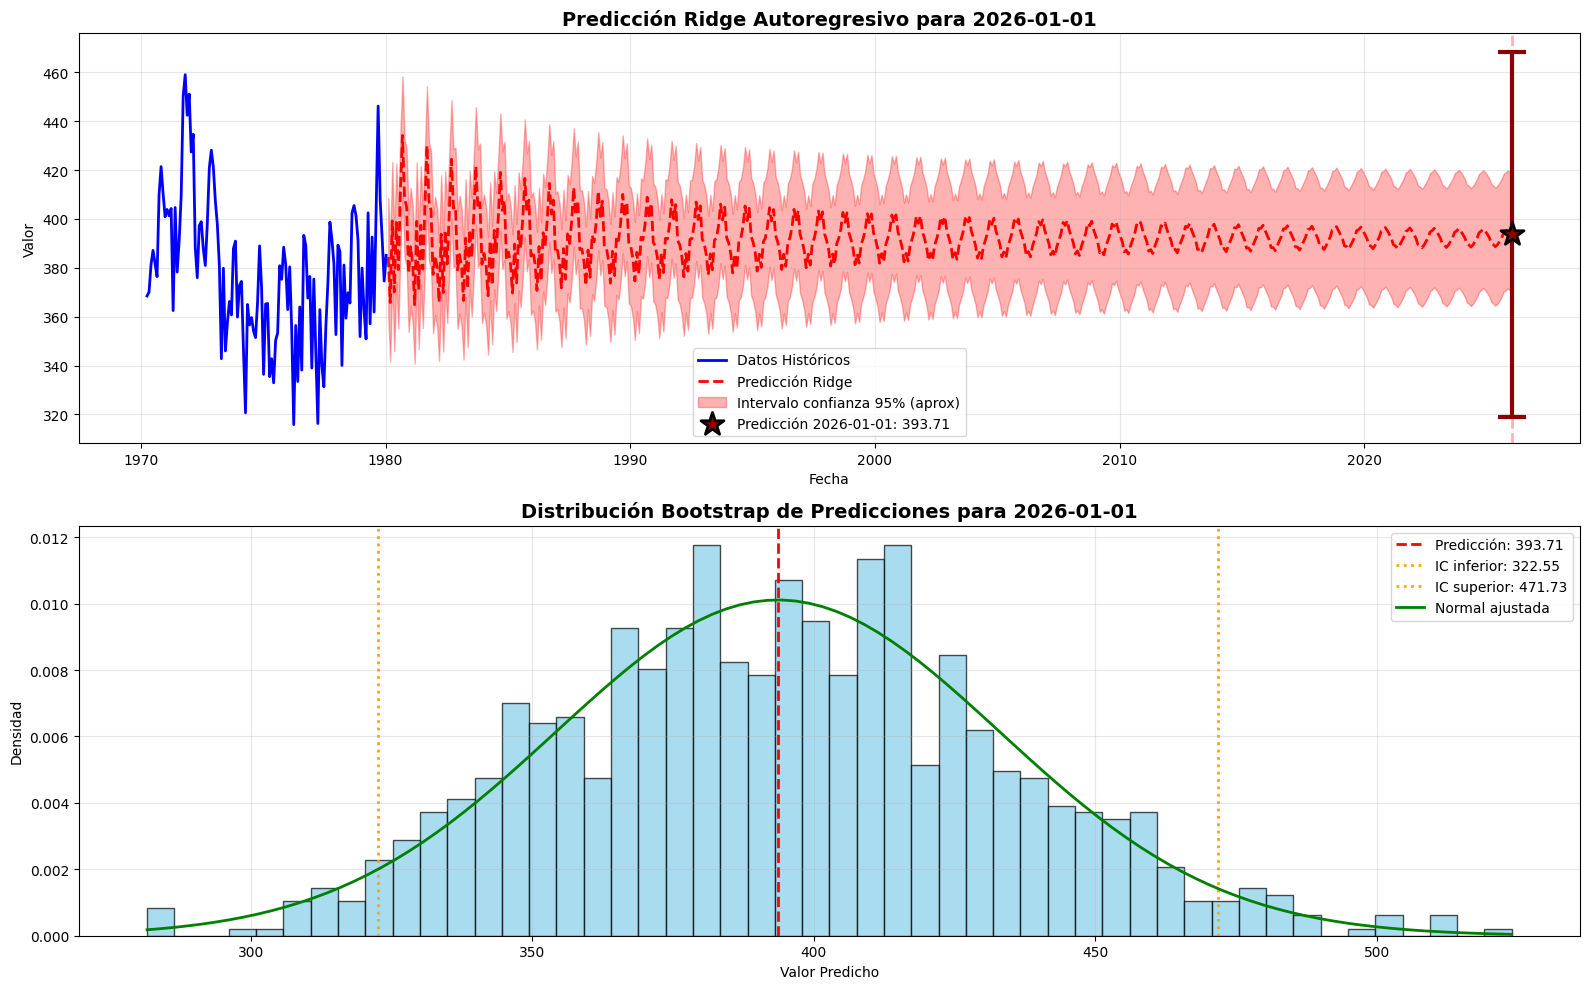

✓ Gráfico guardado en 'prediccion_ridge_2026_completa.png'


In [ ]:
# ========================================
# VISUALIZACIÓN FINAL
# ========================================

fig, axes = plt.subplots(2, 1, figsize=(16, 10))

# Gráfico 1: Serie completa con predicciones
ultimos_anos = 120  # Últimos 10 años
axes[0].plot(df['date'].tail(ultimos_anos), df['value'].tail(ultimos_anos), 
            label='Datos Históricos', color='blue', linewidth=2)

# Predicciones futuras
axes[0].plot(fechas_futuro, predicciones_futuro, 
            label='Predicción Ridge', color='red', linewidth=2, linestyle='--')

# Intervalo de confianza (aproximado)
# Calcular intervalos para toda la serie futura (no solo 2026)
predicciones_futuro_array = np.array(predicciones_futuro)
limite_inf_serie = predicciones_futuro_array - 2*std_residuos
limite_sup_serie = predicciones_futuro_array + 2*std_residuos

axes[0].fill_between(fechas_futuro, limite_inf_serie, limite_sup_serie,
                     alpha=0.3, color='red', label='Intervalo confianza 95% (aprox)')

# Marcar 2026-01-01
axes[0].scatter([fecha_2026], [prediccion_2026], 
               color='darkred', s=300, zorder=5, marker='*',
               edgecolors='black', linewidths=2,
               label=f'Predicción 2026-01-01: {prediccion_2026:.2f}')

# Barra de error en 2026
axes[0].errorbar(fecha_2026, prediccion_2026, 
                yerr=incertidumbre,
                fmt='none', ecolor='darkred', elinewidth=3, 
                capsize=10, capthick=3, zorder=4)

axes[0].axvline(fecha_2026, color='red', linestyle='--', alpha=0.3, linewidth=2)

axes[0].set_title('Predicción Ridge Autoregresivo para 2026-01-01', 
                 fontsize=14, fontweight='bold')
axes[0].set_xlabel('Fecha')
axes[0].set_ylabel('Valor')
axes[0].legend(loc='best')
axes[0].grid(True, alpha=0.3)

# Gráfico 2: Distribución Bootstrap de predicciones 2026
axes[1].hist(predicciones_bootstrap, bins=50, density=True, 
            alpha=0.7, color='skyblue', edgecolor='black')

# Línea de predicción puntual
axes[1].axvline(prediccion_2026, color='red', linestyle='--', 
               linewidth=2, label=f'Predicción: {prediccion_2026:.2f}')

# Líneas de intervalos
axes[1].axvline(limite_inferior, color='orange', linestyle=':', 
               linewidth=2, label=f'IC inferior: {limite_inferior:.2f}')
axes[1].axvline(limite_superior, color='orange', linestyle=':', 
               linewidth=2, label=f'IC superior: {limite_superior:.2f}')

# Ajustar distribución normal
mu, sigma = np.mean(predicciones_bootstrap), np.std(predicciones_bootstrap)
x_dist = np.linspace(predicciones_bootstrap.min(), predicciones_bootstrap.max(), 100)
axes[1].plot(x_dist, stats.norm.pdf(x_dist, mu, sigma), 
            'g-', linewidth=2, label='Normal ajustada')

axes[1].set_title('Distribución Bootstrap de Predicciones para 2026-01-01', 
                 fontsize=14, fontweight='bold')
axes[1].set_xlabel('Valor Predicho')
axes[1].set_ylabel('Densidad')
axes[1].legend()
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
# plt.savefig('prediccion_ridge_2026_completa.png', dpi=300, bbox_inches='tight')
plt.show()

print("✓ Gráfico guardado en 'prediccion_ridge_2026_completa.png'")
